## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, precision_recall_fscore_support

from sklearn.metrics import (
    confusion_matrix,
    make_scorer,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
)

## EDA

### Load csv file with data

In [3]:
df = pd.read_csv('student_applications_data_2023-09-05_en.csv', encoding = 'ISO-8859-2', sep = ';')

In [4]:
# Set the display option to show all columns
pd.set_option('display.max_columns', None)

In [5]:
df.head()

,Application number,Date submitted,Date closed,Student,Mode of study,"Level of study (I - Engineering, M - Master)",Language,Specialization,Application status,Type of application,Person recevienbg,Person processing,Word regulation in substantation,Word formal in substantation,Word progress in substantation,Was the appeal submitted,Attachments,How many changes of statuses,Registration semester,Academic semester,Semester of study,Missing ECTS,ECTS in recent semester,Total ECTS,Missing subjects from sem 1,Missing subjects from sem 2,Missing subjects from sem 3,Missing subjects from sem 4,Missing subjects from sem 5,Missing subjects from sem 6,Total missing subjects,Missing subjects codes,Payment for repeated subjects,Thesis count,Thesis information,Level of thesis progress,Word family in substantation,Word health in substantation,Word family in substantation.1,Word accident in substantation,Word work in substantation,Word promise in substantation
0,565,13.10.2017 09:26,14.10.2017 08:56,WqAdrXQFVXEuVFbBNi8ZYw,D,I,PL,"Model 2,I,D,PL,7 - Inżynieria Komputerowa",Zamknięty - decyzja pozytywna,Wniosek ogólny,s67ATdcxFRCArkQmkAHEzw,ZRZOnmXcfa9Tlr9XY1AxQ,NO,NO,NO,NO,0,6,NaN,2017Z,7,43,0,167,0,0,0,2,3,9,11,"1DI1404,1DI1502,1DI1605,1DI1603,1DI1608,1DI172...",3260,0,NaN,NaN,NIE,NIE,NIE,NIE,TAK,NIE
1,111,15.09.2017 17:02,19.09.2017 16:05,b7uHtLHmJCf40Cj27vMhVg,Z,I,PL,"Model 2,I,Z,PL,8 - Technika Wysokich Napięć i ...",Zamknięty - decyzja negatywna,Podanie o rejestrację,FUYMkMMRDa35xtOw0V36w,CFN5v4I1QvglQe1ZzUQew,NO,NO,YES,NO,0,6,NaN,2017L,6,42,2,116,0,0,1,5,3,2,11,"1ZE1318,1ZE1417,1ZE1703,1ZE1420,1ZE1403,1ZE141...",1250,0,NaN,NaN,TAK,TAK,NIE,NIE,NIE,NIE
2,294,18.09.2017 22:57,19.09.2017 16:27,DjOIoCquSJwSIQ96XqbiQ,Z,I,PL,"Model 2,I,Z,PL,8 - Elektroenergetyka",Zamknięty - decyzja pozytywna,Podanie o rejestrację,FUYMkMMRDa35xtOw0V36w,CFN5v4I1QvglQe1ZzUQew,NO,NO,NO,NO,0,4,NaN,2017L,4,0,10,168,0,1,3,1,0,0,7,"1ZE1221,1ZE1305,1ZE1306,1ZE1308,1ZE1407,1ZE150...",560,0,NaN,NaN,NIE,NIE,NIE,NIE,NIE,NIE
3,41,-,15.09.2017 09:23,R9larUFY1MSuVgu3YA4iUA,D,M,PL,"Model 2,M,D,PL,3 - Automatyka",Anulowany - usunięty,Wniosek ogólny,NaN,ZRZOnmXcfa9Tlr9XY1AxQ,NO,NO,NO,NO,0,4,NaN,2017L,3,0,3,67,0,0,0,0,0,0,1,1DW2314,0,0,NaN,NaN,NIE,NIE,NIE,NIE,TAK,NIE
4,37,-,15.09.2017 15:38,ZMyetWXFos7lfJ9HOQWw6Q,D,I,EN,"Model 2,I,D,EN,8 - Electrical Engineering",Anulowany - usunięty,Podanie o rejestrację,NaN,NaN,NO,NO,NO,NO,0,3,NaN,2017L,6,0,13,157,0,0,1,1,2,0,4,"1DA1312,1DA1410,1DA1504,1DA1506",320,0,NaN,NaN,NIE,NIE,NIE,NIE,TAK,NIE


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37527 entries, 0 to 37526
Data columns (total 42 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Application number                            37527 non-null  int64 
 1   Date submitted                                37527 non-null  object
 2   Date closed                                   37527 non-null  object
 3   Student                                       37527 non-null  object
 4   Mode of study                                 37527 non-null  object
 5   Level of study (I - Engineering, M - Master)  37527 non-null  object
 6   Language                                      37527 non-null  object
 7   Specialization                                37527 non-null  object
 8   Application status                            37527 non-null  object
 9   Type of application                           37527 non-null  object
 10

As we can see, there are null values in some columns. That's why it's necessary to clean the data

We can see below all names of columns

In [7]:
df.columns

Index(['Application number', 'Date submitted', 'Date closed', 'Student',
       'Mode of study ', 'Level of study (I - Engineering, M - Master)',
       'Language', 'Specialization', 'Application status',
       'Type of application', 'Person recevienbg', 'Person processing',
       'Word regulation in substantation', 'Word formal in substantation',
       'Word progress in substantation', 'Was the appeal submitted',
       'Attachments', 'How many changes of statuses', 'Registration semester',
       'Academic semester', 'Semester of study', 'Missing ECTS',
       'ECTS in recent semester', 'Total ECTS', 'Missing subjects from sem 1',
       'Missing subjects from sem 2', 'Missing subjects from sem 3',
       'Missing subjects from sem 4', 'Missing subjects from sem 5',
       'Missing subjects from sem 6', 'Total missing subjects',
       'Missing subjects codes', 'Payment for repeated subjects',
       'Thesis count', 'Thesis information', 'Level of thesis progress',
       'Word fa

Taking into account a fact that the target of prediction is the Application Status, I display all values of it

In [8]:
df["Application status"].unique()

array(['Zamknięty - decyzja pozytywna', 'Zamknięty - decyzja negatywna',
       'Anulowany - usunięty', 'Zamknięty - inne',
       'Zamknięty - odrzucony formalnie', 'Zwrócony do korekty',
       'W trakcie edycji - niezłożony',
       'Decyzja pozytywna - oczekuje na realizację',
       'Rozpatrywany w dziekanacie',
       'Oczekuje na akceptację opiekuna pracy',
       'Oczekuje na wniosek Kierownika Zakładu',
       'Oczekuje na opinię opiekuna pracy',
       'Oczekuje na decyzję Dziekana ds. Studiów',
       'Oczekuje na decyzję Dziekana ds. Studenckich'], dtype=object)

I'm interested in only two vaules from column: "Application status". <br>
Those are: 'Zamknięty - decyzja pozytywna', 'Zamknięty - decyzja negatywna'<br>
It's the most important data in the dataset

So I clean the dataframe df to retrieve only these two values

In [9]:
to_include = ("Zamknięty - decyzja pozytywna",
              "Zamknięty - decyzja negatywna")

df = df[df["Application status"].isin(to_include)]

Now I want to visualise the lack of data in new dataframe

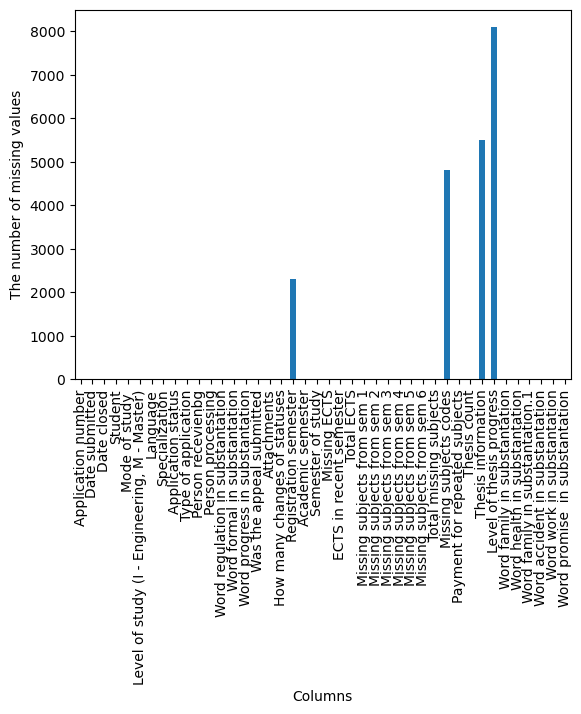

In [10]:
# Create a bar graph
missing_values = df.isnull().sum()
missing_values.plot(kind='bar')

# Adding labels to the x and y axes
plt.xlabel('Columns')
plt.ylabel('The number of missing values')

# Chart display
plt.show()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9516 entries, 0 to 37525
Data columns (total 42 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Application number                            9516 non-null   int64 
 1   Date submitted                                9516 non-null   object
 2   Date closed                                   9516 non-null   object
 3   Student                                       9516 non-null   object
 4   Mode of study                                 9516 non-null   object
 5   Level of study (I - Engineering, M - Master)  9516 non-null   object
 6   Language                                      9516 non-null   object
 7   Specialization                                9516 non-null   object
 8   Application status                            9516 non-null   object
 9   Type of application                           9516 non-null   object
 10 

As we can see, there are 4 columns with null values

In [12]:
len(df)

9516

In [13]:
df.head()

,Application number,Date submitted,Date closed,Student,Mode of study,"Level of study (I - Engineering, M - Master)",Language,Specialization,Application status,Type of application,Person recevienbg,Person processing,Word regulation in substantation,Word formal in substantation,Word progress in substantation,Was the appeal submitted,Attachments,How many changes of statuses,Registration semester,Academic semester,Semester of study,Missing ECTS,ECTS in recent semester,Total ECTS,Missing subjects from sem 1,Missing subjects from sem 2,Missing subjects from sem 3,Missing subjects from sem 4,Missing subjects from sem 5,Missing subjects from sem 6,Total missing subjects,Missing subjects codes,Payment for repeated subjects,Thesis count,Thesis information,Level of thesis progress,Word family in substantation,Word health in substantation,Word family in substantation.1,Word accident in substantation,Word work in substantation,Word promise in substantation
0,565,13.10.2017 09:26,14.10.2017 08:56,WqAdrXQFVXEuVFbBNi8ZYw,D,I,PL,"Model 2,I,D,PL,7 - Inżynieria Komputerowa",Zamknięty - decyzja pozytywna,Wniosek ogólny,s67ATdcxFRCArkQmkAHEzw,ZRZOnmXcfa9Tlr9XY1AxQ,NO,NO,NO,NO,0,6,NaN,2017Z,7,43,0,167,0,0,0,2,3,9,11,"1DI1404,1DI1502,1DI1605,1DI1603,1DI1608,1DI172...",3260,0,NaN,NaN,NIE,NIE,NIE,NIE,TAK,NIE
1,111,15.09.2017 17:02,19.09.2017 16:05,b7uHtLHmJCf40Cj27vMhVg,Z,I,PL,"Model 2,I,Z,PL,8 - Technika Wysokich Napięć i ...",Zamknięty - decyzja negatywna,Podanie o rejestrację,FUYMkMMRDa35xtOw0V36w,CFN5v4I1QvglQe1ZzUQew,NO,NO,YES,NO,0,6,NaN,2017L,6,42,2,116,0,0,1,5,3,2,11,"1ZE1318,1ZE1417,1ZE1703,1ZE1420,1ZE1403,1ZE141...",1250,0,NaN,NaN,TAK,TAK,NIE,NIE,NIE,NIE
2,294,18.09.2017 22:57,19.09.2017 16:27,DjOIoCquSJwSIQ96XqbiQ,Z,I,PL,"Model 2,I,Z,PL,8 - Elektroenergetyka",Zamknięty - decyzja pozytywna,Podanie o rejestrację,FUYMkMMRDa35xtOw0V36w,CFN5v4I1QvglQe1ZzUQew,NO,NO,NO,NO,0,4,NaN,2017L,4,0,10,168,0,1,3,1,0,0,7,"1ZE1221,1ZE1305,1ZE1306,1ZE1308,1ZE1407,1ZE150...",560,0,NaN,NaN,NIE,NIE,NIE,NIE,NIE,NIE
6,13,14.09.2017 10:16,15.09.2017 13:38,cKN0GNsJejbI3uFXBTlw,D,I,PL,"Model 2,I,D,PL,7 - Elektromechatronika Pojazdó...",Zamknięty - decyzja pozytywna,Podanie o rejestrację,FUYMkMMRDa35xtOw0V36w,WXJX9CCNKupY4S1OKIcNWg,NO,NO,NO,NO,0,12,NaN,2017L,6,0,21,151,0,0,4,2,2,0,10,"1DE1204,1DE1302,1DE1301,1DE1305,1DE1413,1DE141...",2150,0,NaN,NaN,NIE,NIE,NIE,NIE,TAK,NIE
8,301,18.09.2017 23:29,19.09.2017 16:29,EJ0ALSHjEfgLOOCgPO0RjA,Z,I,PL,"Model 2,I,Z,PL,8 - Technika Wysokich Napięć i ...",Zamknięty - decyzja pozytywna,Podanie o rejestrację,FUYMkMMRDa35xtOw0V36w,CFN5v4I1QvglQe1ZzUQew,NO,NO,NO,NO,0,4,NaN,2017L,6,32,15,126,0,1,2,3,2,7,7,"1ZE1221,1ZE1306,1ZE1308,1ZE1510,1ZE1506,1ZE161...",560,0,NaN,NaN,NIE,NIE,NIE,NIE,NIE,NIE


Now I want to check what Types of applications our dataframe contains

In [14]:
df['Type of application'].value_counts()

Wniosek ogólny                                              4666
Podanie o rejestrację                                       1429
Wniosek o przedłużenie terminu złożenia pracy dyplomowej    1426
Wniosek o transfer przedmiotów                               831
Wniosek o zmniejszenie opłaty za powtarzanie                 478
Wniosek o rozłożenie opłaty za studia na raty                390
Podanie o urlop                                              114
Wniosek o umorzenie opłaty za powtarzane zajęcia\n           106
Potwierdzenie opłaty                                          59
Wniosek o dopuszczenie do egzaminu dyplomowego                 9
Wniosek o wydanie zawiadczenia o odbywaniu studiów            8
Name: Type of application, dtype: int64

I visualise the data on the bar plot

C:\Moje_programy\envs\ZMWD1\lib\site-packages\ipykernel_launcher.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  after removing the cwd from sys.path.
C:\Moje_programy\envs\ZMWD1\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 156 (\x9c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


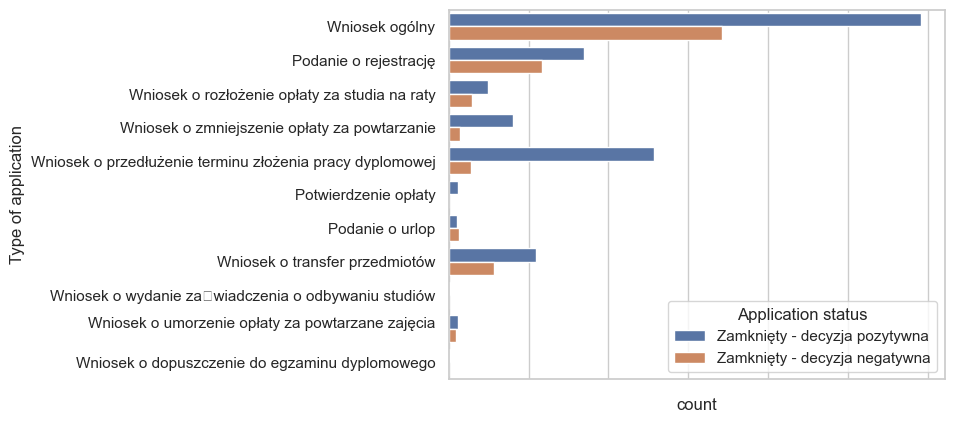

In [15]:
sns.set(style="whitegrid")
ax = sns.countplot(data=df, y="Type of application", hue="Application status", orient="h")

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

I create a new column 'Target' containing 1 and 0 values instead of text data

In [16]:
df['Target'] = pd.get_dummies(df["Application status"]).loc[:,'Zamknięty - decyzja pozytywna']

In [17]:
df.head()

,Application number,Date submitted,Date closed,Student,Mode of study,"Level of study (I - Engineering, M - Master)",Language,Specialization,Application status,Type of application,Person recevienbg,Person processing,Word regulation in substantation,Word formal in substantation,Word progress in substantation,Was the appeal submitted,Attachments,How many changes of statuses,Registration semester,Academic semester,Semester of study,Missing ECTS,ECTS in recent semester,Total ECTS,Missing subjects from sem 1,Missing subjects from sem 2,Missing subjects from sem 3,Missing subjects from sem 4,Missing subjects from sem 5,Missing subjects from sem 6,Total missing subjects,Missing subjects codes,Payment for repeated subjects,Thesis count,Thesis information,Level of thesis progress,Word family in substantation,Word health in substantation,Word family in substantation.1,Word accident in substantation,Word work in substantation,Word promise in substantation,Target
0,565,13.10.2017 09:26,14.10.2017 08:56,WqAdrXQFVXEuVFbBNi8ZYw,D,I,PL,"Model 2,I,D,PL,7 - Inżynieria Komputerowa",Zamknięty - decyzja pozytywna,Wniosek ogólny,s67ATdcxFRCArkQmkAHEzw,ZRZOnmXcfa9Tlr9XY1AxQ,NO,NO,NO,NO,0,6,NaN,2017Z,7,43,0,167,0,0,0,2,3,9,11,"1DI1404,1DI1502,1DI1605,1DI1603,1DI1608,1DI172...",3260,0,NaN,NaN,NIE,NIE,NIE,NIE,TAK,NIE,1
1,111,15.09.2017 17:02,19.09.2017 16:05,b7uHtLHmJCf40Cj27vMhVg,Z,I,PL,"Model 2,I,Z,PL,8 - Technika Wysokich Napięć i ...",Zamknięty - decyzja negatywna,Podanie o rejestrację,FUYMkMMRDa35xtOw0V36w,CFN5v4I1QvglQe1ZzUQew,NO,NO,YES,NO,0,6,NaN,2017L,6,42,2,116,0,0,1,5,3,2,11,"1ZE1318,1ZE1417,1ZE1703,1ZE1420,1ZE1403,1ZE141...",1250,0,NaN,NaN,TAK,TAK,NIE,NIE,NIE,NIE,0
2,294,18.09.2017 22:57,19.09.2017 16:27,DjOIoCquSJwSIQ96XqbiQ,Z,I,PL,"Model 2,I,Z,PL,8 - Elektroenergetyka",Zamknięty - decyzja pozytywna,Podanie o rejestrację,FUYMkMMRDa35xtOw0V36w,CFN5v4I1QvglQe1ZzUQew,NO,NO,NO,NO,0,4,NaN,2017L,4,0,10,168,0,1,3,1,0,0,7,"1ZE1221,1ZE1305,1ZE1306,1ZE1308,1ZE1407,1ZE150...",560,0,NaN,NaN,NIE,NIE,NIE,NIE,NIE,NIE,1
6,13,14.09.2017 10:16,15.09.2017 13:38,cKN0GNsJejbI3uFXBTlw,D,I,PL,"Model 2,I,D,PL,7 - Elektromechatronika Pojazdó...",Zamknięty - decyzja pozytywna,Podanie o rejestrację,FUYMkMMRDa35xtOw0V36w,WXJX9CCNKupY4S1OKIcNWg,NO,NO,NO,NO,0,12,NaN,2017L,6,0,21,151,0,0,4,2,2,0,10,"1DE1204,1DE1302,1DE1301,1DE1305,1DE1413,1DE141...",2150,0,NaN,NaN,NIE,NIE,NIE,NIE,TAK,NIE,1
8,301,18.09.2017 23:29,19.09.2017 16:29,EJ0ALSHjEfgLOOCgPO0RjA,Z,I,PL,"Model 2,I,Z,PL,8 - Technika Wysokich Napięć i ...",Zamknięty - decyzja pozytywna,Podanie o rejestrację,FUYMkMMRDa35xtOw0V36w,CFN5v4I1QvglQe1ZzUQew,NO,NO,NO,NO,0,4,NaN,2017L,6,32,15,126,0,1,2,3,2,7,7,"1ZE1221,1ZE1306,1ZE1308,1ZE1510,1ZE1506,1ZE161...",560,0,NaN,NaN,NIE,NIE,NIE,NIE,NIE,NIE,1


## Data cleaning

In [18]:
df.columns

Index(['Application number', 'Date submitted', 'Date closed', 'Student',
       'Mode of study ', 'Level of study (I - Engineering, M - Master)',
       'Language', 'Specialization', 'Application status',
       'Type of application', 'Person recevienbg', 'Person processing',
       'Word regulation in substantation', 'Word formal in substantation',
       'Word progress in substantation', 'Was the appeal submitted',
       'Attachments', 'How many changes of statuses', 'Registration semester',
       'Academic semester', 'Semester of study', 'Missing ECTS',
       'ECTS in recent semester', 'Total ECTS', 'Missing subjects from sem 1',
       'Missing subjects from sem 2', 'Missing subjects from sem 3',
       'Missing subjects from sem 4', 'Missing subjects from sem 5',
       'Missing subjects from sem 6', 'Total missing subjects',
       'Missing subjects codes', 'Payment for repeated subjects',
       'Thesis count', 'Thesis information', 'Level of thesis progress',
       'Word fa

I see the columns names and decide wchich one are useless in data predicting

In [19]:
# What data we can skip at first glance?

data_to_skip = ['Application number', 'Date submitted', 'Date closed', 'Student', 'Person recevienbg', 'Person processing',
                'Missing subjects codes', 'Academic semester','Registration semester', 'Thesis information']
data_for_conclusion = ['Mode of study ', 'Level of study (I - Engineering, M - Master)','Language', 'Specialization', 'Application status',
       'Type of application','Word regulation in substantation', 'Word formal in substantation',
       'Word progress in substantation', 'Was the appeal submitted',
       'Attachments', 'How many changes of statuses',
       'Semester of study', 'Missing ECTS',
       'ECTS in recent semester', 'Total ECTS', 'Missing subjects from sem 1',
       'Missing subjects from sem 2', 'Missing subjects from sem 3',
       'Missing subjects from sem 4', 'Missing subjects from sem 5',
       'Missing subjects from sem 6', 'Total missing subjects', 'Payment for repeated subjects',
       'Thesis count', 'Level of thesis progress',
       'Word family in substantation', 'Word health in substantation',
       'Word family in substantation.1', 'Word accident in substantation',
       'Word work in substantation', 'Word promise  in substantation',
       'Target']

I delete all data_to_skip from dataframe

In [20]:
df_2 = df.drop(data_to_skip, axis=1) 

Data cleaning for type of application

Only 6 types of applications have enough amount of data to process them later

In [21]:
df_3 = df_2

In [22]:
glam = ['Potwierdzenie opłaty','Podanie o urlop','Wniosek o wydanie zawiadczenia o odbywaniu studiów','Wniosek o umorzenie opłaty za powtarzane zajęcia\n','Wniosek o dopuszczenie do egzaminu dyplomowego']
df_3 = df_3[~df_3["Type of application"].isin(glam)]


Now I have 6 types of applications in my dataframe

In [23]:
df_3["Type of application"].unique()

array(['Wniosek ogólny', 'Podanie o rejestrację',
       'Wniosek o rozłożenie opłaty za studia na raty',
       'Wniosek o zmniejszenie opłaty za powtarzanie',
       'Wniosek o przedłużenie terminu złożenia pracy dyplomowej',
       'Wniosek o transfer przedmiotów'], dtype=object)

In [24]:
df_3.head()

,Mode of study,"Level of study (I - Engineering, M - Master)",Language,Specialization,Application status,Type of application,Word regulation in substantation,Word formal in substantation,Word progress in substantation,Was the appeal submitted,Attachments,How many changes of statuses,Semester of study,Missing ECTS,ECTS in recent semester,Total ECTS,Missing subjects from sem 1,Missing subjects from sem 2,Missing subjects from sem 3,Missing subjects from sem 4,Missing subjects from sem 5,Missing subjects from sem 6,Total missing subjects,Payment for repeated subjects,Thesis count,Level of thesis progress,Word family in substantation,Word health in substantation,Word family in substantation.1,Word accident in substantation,Word work in substantation,Word promise in substantation,Target
0,D,I,PL,"Model 2,I,D,PL,7 - Inżynieria Komputerowa",Zamknięty - decyzja pozytywna,Wniosek ogólny,NO,NO,NO,NO,0,6,7,43,0,167,0,0,0,2,3,9,11,3260,0,NaN,NIE,NIE,NIE,NIE,TAK,NIE,1
1,Z,I,PL,"Model 2,I,Z,PL,8 - Technika Wysokich Napięć i ...",Zamknięty - decyzja negatywna,Podanie o rejestrację,NO,NO,YES,NO,0,6,6,42,2,116,0,0,1,5,3,2,11,1250,0,NaN,TAK,TAK,NIE,NIE,NIE,NIE,0
2,Z,I,PL,"Model 2,I,Z,PL,8 - Elektroenergetyka",Zamknięty - decyzja pozytywna,Podanie o rejestrację,NO,NO,NO,NO,0,4,4,0,10,168,0,1,3,1,0,0,7,560,0,NaN,NIE,NIE,NIE,NIE,NIE,NIE,1
6,D,I,PL,"Model 2,I,D,PL,7 - Elektromechatronika Pojazdó...",Zamknięty - decyzja pozytywna,Podanie o rejestrację,NO,NO,NO,NO,0,12,6,0,21,151,0,0,4,2,2,0,10,2150,0,NaN,NIE,NIE,NIE,NIE,TAK,NIE,1
8,Z,I,PL,"Model 2,I,Z,PL,8 - Technika Wysokich Napięć i ...",Zamknięty - decyzja pozytywna,Podanie o rejestrację,NO,NO,NO,NO,0,4,6,32,15,126,0,1,2,3,2,7,7,560,0,NaN,NIE,NIE,NIE,NIE,NIE,NIE,1


C:\Moje_programy\envs\ZMWD1\lib\site-packages\ipykernel_launcher.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  after removing the cwd from sys.path.


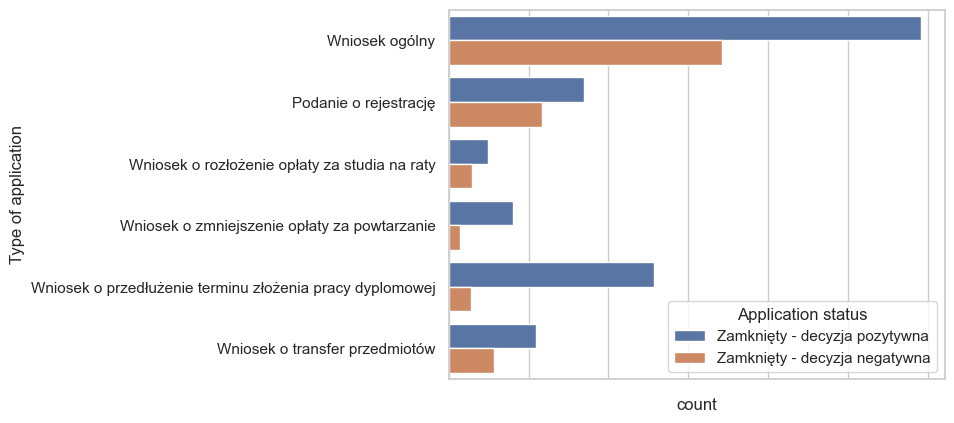

In [25]:
sns.set(style="whitegrid")
ax = sns.countplot(data=df_3, y="Type of application", hue="Application status", orient="h")

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

## Checking data in columns

Filling or deleting rows in columns depending of the situation.<br>
Changing textual data to 1 and 0

## 'Language' column to int

In [26]:
df_3.Language.unique()

array(['PL', 'EN'], dtype=object)

In [27]:
df_3["Language_2"] = pd.get_dummies(df_3["Language"]).loc[:,'PL']

C:\Moje_programy\envs\ZMWD1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
df_3.head(2)

,Mode of study,"Level of study (I - Engineering, M - Master)",Language,Specialization,Application status,Type of application,Word regulation in substantation,Word formal in substantation,Word progress in substantation,Was the appeal submitted,Attachments,How many changes of statuses,Semester of study,Missing ECTS,ECTS in recent semester,Total ECTS,Missing subjects from sem 1,Missing subjects from sem 2,Missing subjects from sem 3,Missing subjects from sem 4,Missing subjects from sem 5,Missing subjects from sem 6,Total missing subjects,Payment for repeated subjects,Thesis count,Level of thesis progress,Word family in substantation,Word health in substantation,Word family in substantation.1,Word accident in substantation,Word work in substantation,Word promise in substantation,Target,Language_2
0,D,I,PL,"Model 2,I,D,PL,7 - Inżynieria Komputerowa",Zamknięty - decyzja pozytywna,Wniosek ogólny,NO,NO,NO,NO,0,6,7,43,0,167,0,0,0,2,3,9,11,3260,0,NaN,NIE,NIE,NIE,NIE,TAK,NIE,1,1
1,Z,I,PL,"Model 2,I,Z,PL,8 - Technika Wysokich Napięć i ...",Zamknięty - decyzja negatywna,Podanie o rejestrację,NO,NO,YES,NO,0,6,6,42,2,116,0,0,1,5,3,2,11,1250,0,NaN,TAK,TAK,NIE,NIE,NIE,NIE,0,1


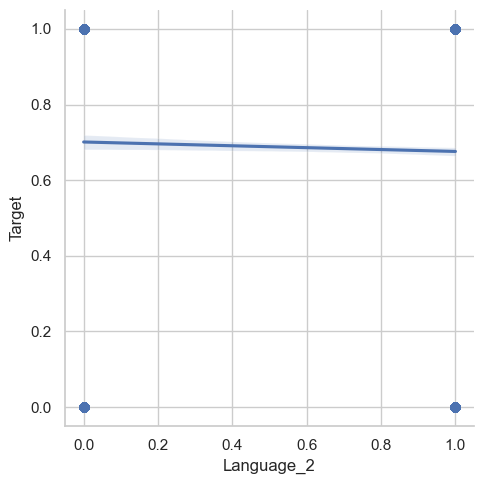

In [29]:
sns.lmplot(data=df_3, x='Language_2', y = "Target")

In [30]:
# Language is not important in final dean decision

## 'Mode of study' column

In [31]:
df_3['Mode of study '].unique()

array(['D', 'Z', 'O'], dtype=object)

In [32]:
# df_3['Mode of study '].sum('O')
len(df_3[df_3['Mode of study '] == 'O'])

11

Deleting 'O' value, because I have no idea what it means

In [33]:
# Find row indexes which contains 'O'
indexNames_3 = df_3[df_3['Mode of study '] == 'O'].index

# Delete indexes from datagrame
df_3.drop(indexNames_3, inplace=True)

C:\Moje_programy\envs\ZMWD1\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [34]:
len(df_3[df_3['Mode of study '] == 'O'])

0

Creating new column for 1 and 0 values

In [35]:
df_3["Mode of study_2"] = pd.get_dummies(df_3["Mode of study "]).loc[:,'D']

C:\Moje_programy\envs\ZMWD1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


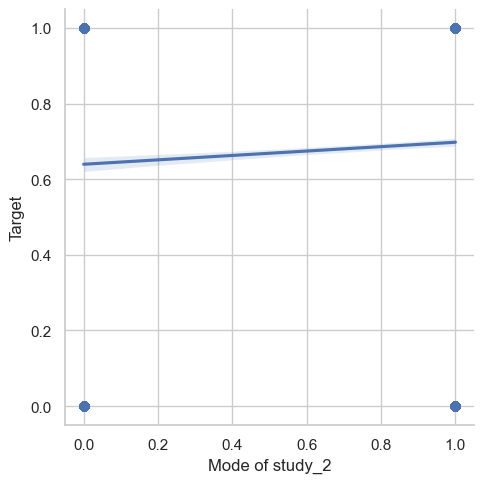

In [36]:
sns.lmplot(data=df_3, x='Mode of study_2', y = "Target")

## 'Level of study (I - Engineering, M - Master)' column

In [37]:
# 'Level of study (I - Engineering, M - Master)'
df_3['Level of study (I - Engineering, M - Master)'].unique()

array(['I', 'M', 'P', 'E', 'D'], dtype=object)

In [38]:
len(df_3[df_3['Level of study (I - Engineering, M - Master)'] == 'D'])

1

Deleting unknown values

In [39]:
glamm = ['P', 'E', 'D']
df_3 = df_3[~df_3['Level of study (I - Engineering, M - Master)'].isin(glamm)]

In [40]:
df_3['Level of study (I - Engineering, M - Master)'].unique()

array(['I', 'M'], dtype=object)

In [41]:
df_3.shape

(9193, 35)

Creating new column for 1 and 0 values

In [42]:
df_3["Level of study (I - Engineering, M - Master)_2"] = pd.get_dummies(df_3["Level of study (I - Engineering, M - Master)"]).loc[:,'I']

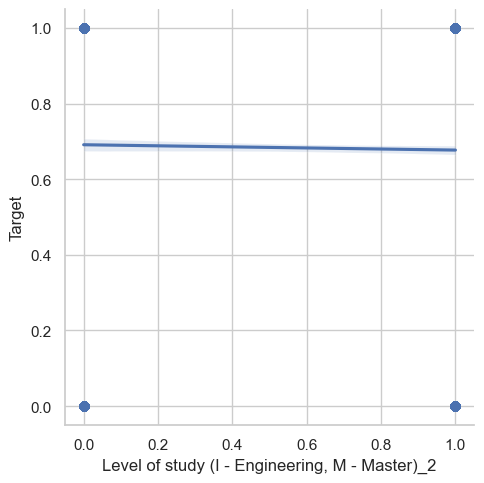

In [43]:
sns.lmplot(data=df_3, x='Level of study (I - Engineering, M - Master)_2', y = "Target")
#                          

In [44]:
# There's no visible correlation

## 'Word regulation in substantation' column

In [45]:
df_3['Word regulation in substantation'].unique()

array(['NO', 'YES'], dtype=object)

Creating new column for 1 and 0 values

In [46]:
df_3["Word regulation in substantation_2"] = pd.get_dummies(df_3["Word regulation in substantation"]).loc[:,'YES']

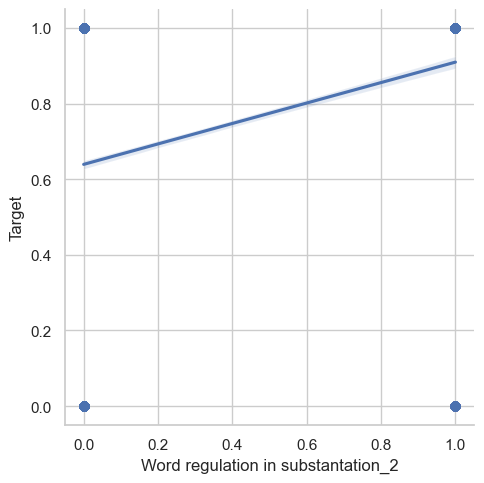

In [47]:
sns.lmplot(data=df_3, x='Word regulation in substantation_2', y = "Target")
                         

In [48]:
# Here's some visible correlation

## 'Specialization' column

In [49]:

df_3['Specialization'].unique()
# There are too many objects to determine correlation

array(['Model 2,I,D,PL,7 - Inżynieria  Komputerowa',
       'Model 2,I,Z,PL,8 - Technika Wysokich Napięć i Kompatybilno\x9cć Elektromagnetyczna',
       'Model 2,I,Z,PL,8 - Elektroenergetyka',
       'Model 2,I,D,PL,7 - Elektromechatronika Pojazdów i Maszyny Elektryczne',
       'Model 2,I,D,PL,7 - Technika Wysokich Napięć i Kompatybilno\x9cć Elektromagnetyczna',
       'Model 2,I,D,PL,7 - Elektronika Przemysłowa',
       'Model 2,I,Z,PL,8 - Elektromechatronika Pojazdów i Maszyny Elektryczne',
       'Model 2,I,D,EN,8 - Electrical Engineering',
       'Model 2,I,D,PL,7 - Inżynieria  Oprogramowania',
       'Model 2,I,D,PL,7 - Systemy wbudowane',
       'Model 2,I,D,PL,7 - Automatyka.',
       'Model 2,I,D,PL,7 - Elektroenergetyka',
       'Model 2,I,Z,PL,8 - Automatyka Przemysłowa',
       'Model 2,M,D,EN,3 - Electrical Engineering',
       'Model 2,I,D,PL,7 - Inżynieria Oprogramowania',
       'Model 2,I,D,PL,7 - Elektrotechnika',
       'Model 2,I,D,PL,7 - Technika \x8cwietlna i Mult

There are too many objects to determine correlation

## 'Word formal in substantation' column

In [50]:
df_3['Word formal in substantation'].unique()

array(['NO', 'YES'], dtype=object)

Creating new column for 1 and 0 values

In [51]:
df_3["Word formal in substantation_2"] = pd.get_dummies(df_3["Word formal in substantation"]).loc[:,'YES']

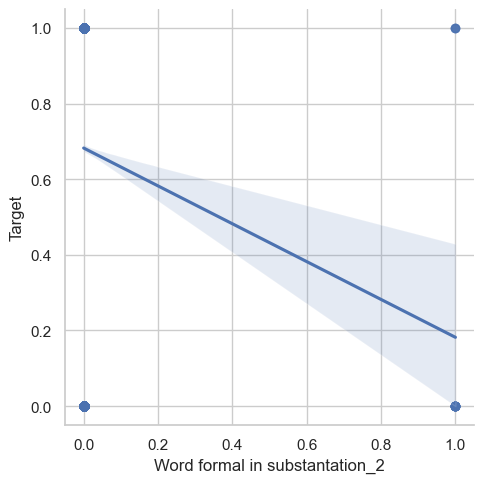

In [52]:
sns.lmplot(data=df_3, x='Word formal in substantation_2', y = "Target")
            

## 'Word progress in substantation' column

In [53]:
# Word progress in substantation
df_3['Word progress in substantation'].unique()

array(['NO', 'YES'], dtype=object)

Creating new column for 1 and 0 values

In [54]:
df_3["Word progress in substantation_2"] = pd.get_dummies(df_3["Word progress in substantation"]).loc[:,'YES']

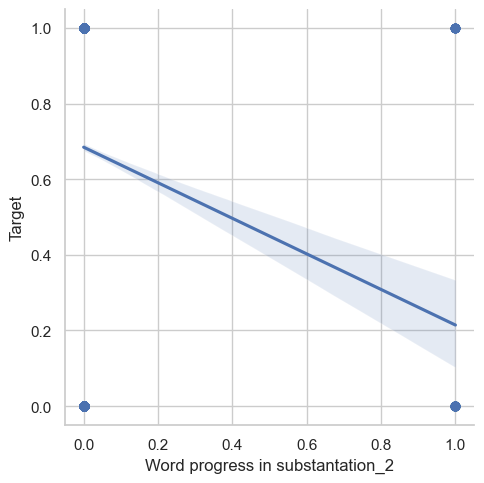

In [55]:
sns.lmplot(data=df_3, x='Word progress in substantation_2', y = "Target")
            

## 'Was the appeal submitted' column

In [56]:
# Was the appeal submitted
df_3['Was the appeal submitted'].unique()

array(['NO', 'YES'], dtype=object)

Creating new column for 1 and 0 values

In [57]:
df_3["Was the appeal submitted_2"] = pd.get_dummies(df_3["Was the appeal submitted"]).loc[:,'YES']

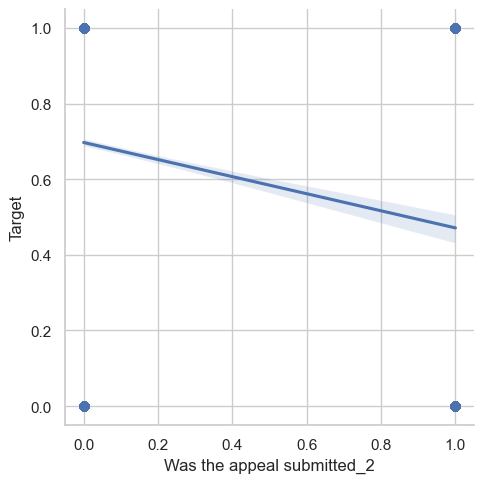

In [58]:
sns.lmplot(data=df_3, x='Was the appeal submitted_2', y = "Target")
            

## 'Semester of study' column

In [59]:
# Semester of study
df_3['Semester of study'].unique()

array(['7', '6', '4', '3', '2', '1', '8', '5'], dtype=object)

Changing values in 'Semester of study' into int values

In [60]:
df_3['Semester of study'] = df_3['Semester of study'].astype('int64')

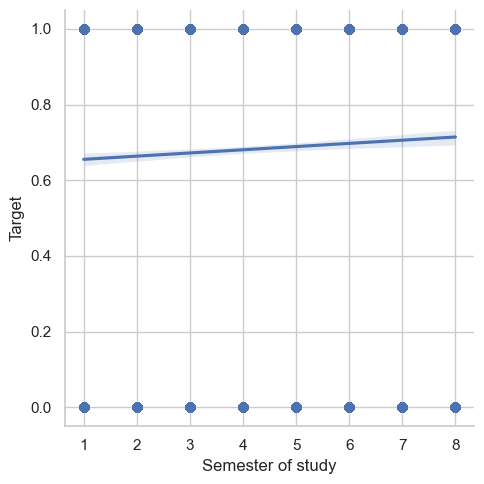

In [61]:
sns.lmplot(data=df_3, x='Semester of study', y = "Target")

## 'Missing ECTS' column

In [62]:
# Missing ECTS
df_3['Missing ECTS'].unique()

array([ 43,  42,   0,  32,  15,  11,  49,  54,  25,  73,   7, 150,  41,
         9,  59,   5,  31,  29,  78,  30,  18,  38,  22,   3,  17,  16,
        65,  70,   6,  46,  12,  37,  21,  19,  13,  14,  47,  36,  35,
        45,  90,  23,  26,   1,  60,  20,  71, 100,  34,  40,   8,  50,
        68,  66,  39,  10,  24,   4,  48, 103,  27,  28,  52,  51, 111,
        56,  72,  55,  61,  85,  33,   2,  64,  93,  62,  57, 127,  44,
        53,  58,  69, 152,  75, 234,  86,  84,  95,  63,  81, 180,  79,
       120,  76,  77, 101], dtype=int64)

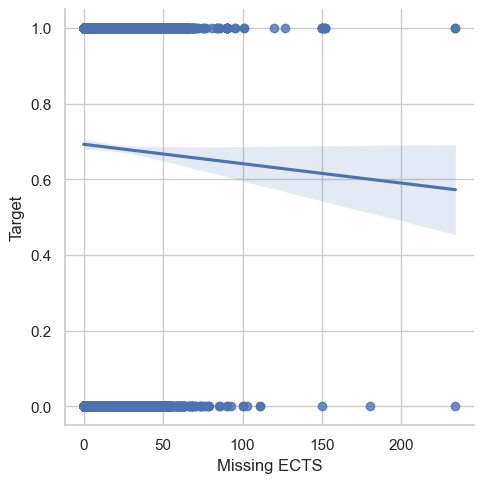

In [63]:
sns.lmplot(data=df_3, x='Missing ECTS', y = "Target")

In [64]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9193 entries, 0 to 37525
Data columns (total 40 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Mode of study                                   9193 non-null   object
 1   Level of study (I - Engineering, M - Master)    9193 non-null   object
 2   Language                                        9193 non-null   object
 3   Specialization                                  9193 non-null   object
 4   Application status                              9193 non-null   object
 5   Type of application                             9193 non-null   object
 6   Word regulation in substantation                9193 non-null   object
 7   Word formal in substantation                    9193 non-null   object
 8   Word progress in substantation                  9193 non-null   object
 9   Was the appeal submitted                        919

This columns has numerical int values so I don't have to change it

## 'ECTS in recent semester' column

This columns has numerical int values so I don't have to change it

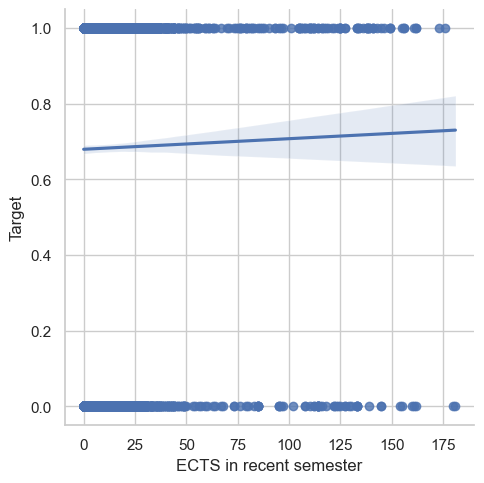

In [65]:

sns.lmplot(data=df_3, x='ECTS in recent semester', y = "Target")

## 'Total ECTS' column

This columns has numerical int values so I don't have to change it

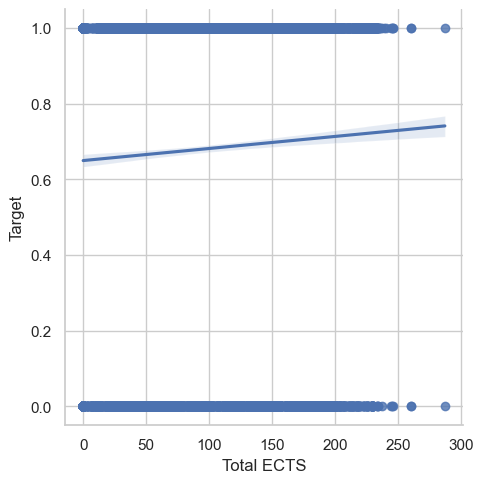

In [66]:
sns.lmplot(data=df_3, x='Total ECTS', y = "Target")

## 'Word family in substantation' column

In [67]:
# Word family in substantation
df_3['Word family in substantation'].unique()

array(['NIE', 'TAK'], dtype=object)

Creating new column for 1 and 0 values

In [68]:
df_3["Word family in substantation_2"] = pd.get_dummies(df_3["Word family in substantation"]).loc[:,'TAK']

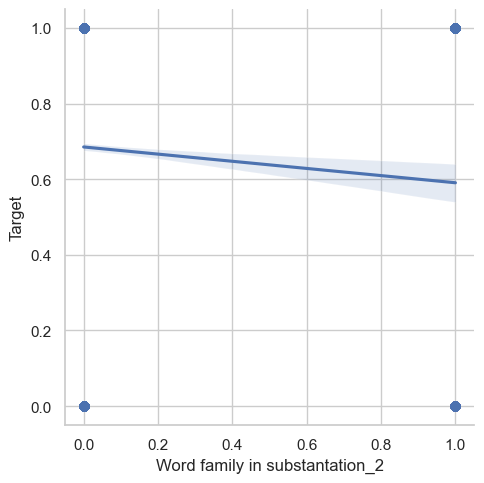

In [69]:
sns.lmplot(data=df_3, x='Word family in substantation_2', y = "Target")

## 'Word health in substantation' column

In [70]:
# 'Word health in substantation'
df_3['Word health in substantation'].unique()

array(['NIE', 'TAK'], dtype=object)

Creating new column for 1 and 0 values

In [71]:
df_3["Word health in substantation_2"] = pd.get_dummies(df_3["Word health in substantation"]).loc[:,'TAK']

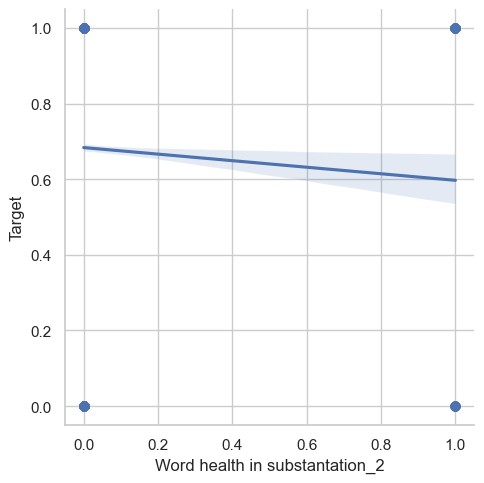

In [72]:
sns.lmplot(data=df_3, x='Word health in substantation_2', y = "Target")

## 'Word family in substantation.1' column

In [73]:
# 'Word family in substantation.1'
df_3['Word family in substantation.1'].unique()

array(['NIE', 'TAK'], dtype=object)

Creating new column for 1 and 0 values

In [74]:
df_3["Word family in substantation.1_2"] = pd.get_dummies(df_3["Word family in substantation.1"]).loc[:,'TAK']

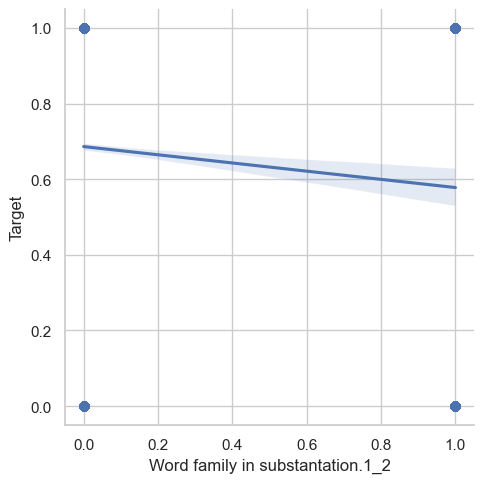

In [75]:
sns.lmplot(data=df_3, x='Word family in substantation.1_2', y = "Target")

## 'Word accident in substantation' column

In [76]:
# 'Word accident in substantation'
df_3['Word accident in substantation'].unique()

array(['NIE', 'TAK'], dtype=object)

Creating new column for 1 and 0 values

In [77]:
df_3["Word accident in substantation_2"] = pd.get_dummies(df_3["Word accident in substantation"]).loc[:,'TAK']

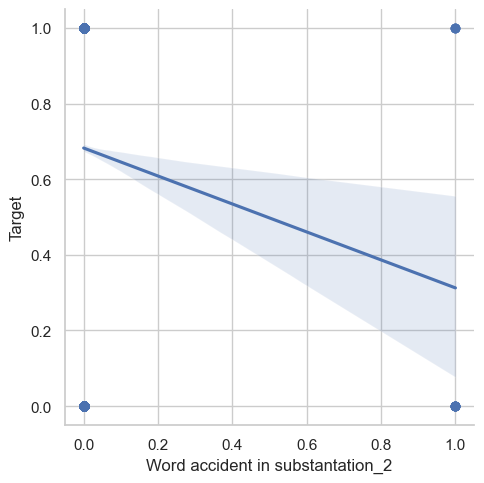

In [78]:
sns.lmplot(data=df_3, x='Word accident in substantation_2', y = "Target")

## 'Word work in substantation' column

In [79]:
# 'Word work in substantation'
df_3['Word work in substantation'].unique()

array(['TAK', 'NIE'], dtype=object)

Creating new column for 1 and 0 values

In [80]:
df_3["Word work in substantation_2"] = pd.get_dummies(df_3["Word work in substantation"]).loc[:,'TAK']

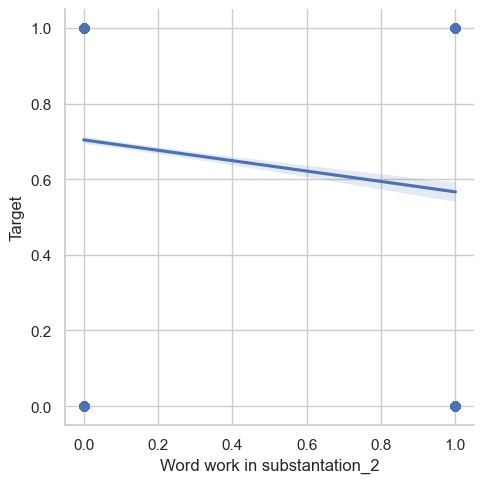

In [81]:
sns.lmplot(data=df_3, x='Word work in substantation_2', y = "Target")

## 'Word promise  in substantation' column

In [82]:
# 'Word promise  in substantation'
df_3['Word promise  in substantation'].unique()

array(['NIE', 'TAK'], dtype=object)

Creating new column for 1 and 0 values

In [83]:
df_3["Word promise  in substantation_2"] = pd.get_dummies(df_3["Word promise  in substantation"]).loc[:,'TAK']

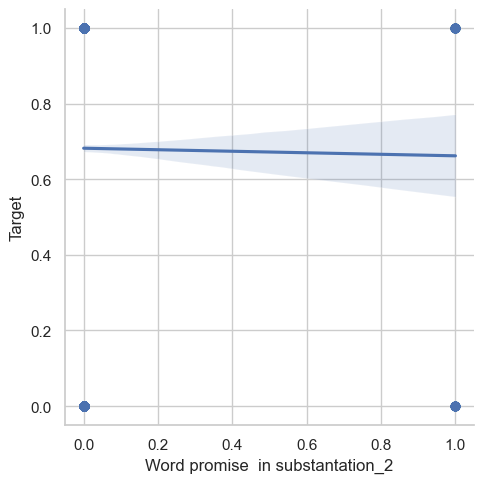

In [84]:
sns.lmplot(data=df_3, x='Word promise  in substantation_2', y = "Target")

In [85]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9193 entries, 0 to 37525
Data columns (total 46 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Mode of study                                   9193 non-null   object
 1   Level of study (I - Engineering, M - Master)    9193 non-null   object
 2   Language                                        9193 non-null   object
 3   Specialization                                  9193 non-null   object
 4   Application status                              9193 non-null   object
 5   Type of application                             9193 non-null   object
 6   Word regulation in substantation                9193 non-null   object
 7   Word formal in substantation                    9193 non-null   object
 8   Word progress in substantation                  9193 non-null   object
 9   Was the appeal submitted                        919

# Dividing of applications

Now I want to split the data into 6 application. That means that each application will have unique dataframe with data only connected with specific type of application.

In [86]:
df_3["Type of application"].unique()

array(['Wniosek ogólny', 'Podanie o rejestrację',
       'Wniosek o rozłożenie opłaty za studia na raty',
       'Wniosek o zmniejszenie opłaty za powtarzanie',
       'Wniosek o przedłużenie terminu złożenia pracy dyplomowej',
       'Wniosek o transfer przedmiotów'], dtype=object)

## ''Wniosek ogólny''

Creating new dataframe for "Wniosek ogólny"

In [87]:
df_ogolny = df_3.loc[df_3["Type of application"] == 'Wniosek ogólny']

In [88]:
df_ogolny.head()

,Mode of study,"Level of study (I - Engineering, M - Master)",Language,Specialization,Application status,Type of application,Word regulation in substantation,Word formal in substantation,Word progress in substantation,Was the appeal submitted,Attachments,How many changes of statuses,Semester of study,Missing ECTS,ECTS in recent semester,Total ECTS,Missing subjects from sem 1,Missing subjects from sem 2,Missing subjects from sem 3,Missing subjects from sem 4,Missing subjects from sem 5,Missing subjects from sem 6,Total missing subjects,Payment for repeated subjects,Thesis count,Level of thesis progress,Word family in substantation,Word health in substantation,Word family in substantation.1,Word accident in substantation,Word work in substantation,Word promise in substantation,Target,Language_2,Mode of study_2,"Level of study (I - Engineering, M - Master)_2",Word regulation in substantation_2,Word formal in substantation_2,Word progress in substantation_2,Was the appeal submitted_2,Word family in substantation_2,Word health in substantation_2,Word family in substantation.1_2,Word accident in substantation_2,Word work in substantation_2,Word promise in substantation_2
0,D,I,PL,"Model 2,I,D,PL,7 - Inżynieria Komputerowa",Zamknięty - decyzja pozytywna,Wniosek ogólny,NO,NO,NO,NO,0,6,7,43,0,167,0,0,0,2,3,9,11,3260,0,NaN,NIE,NIE,NIE,NIE,TAK,NIE,1,1,1,1,0,0,0,0,0,0,0,0,1,0
17,D,I,EN,"Model 2,I,D,EN,8 - Electrical Engineering",Zamknięty - decyzja pozytywna,Wniosek ogólny,NO,NO,NO,NO,0,6,3,25,0,65,0,0,6,0,0,0,0,0,0,NaN,NIE,NIE,NIE,NIE,NIE,NIE,1,0,1,1,0,0,0,0,0,0,0,0,0,0
25,D,I,PL,"Model 2,I,D,PL,7 - Elektroenergetyka",Zamknięty - decyzja pozytywna,Wniosek ogólny,NO,NO,NO,NO,0,9,6,150,0,0,5,11,7,10,13,0,0,0,0,NaN,NIE,NIE,NIE,NIE,NIE,NIE,1,1,1,1,0,0,0,0,0,0,0,0,0,0
29,D,M,EN,"Model 2,M,D,EN,3 - Electrical Engineering",Zamknięty - decyzja pozytywna,Wniosek ogólny,NO,NO,NO,NO,0,4,2,41,0,19,2,8,0,0,0,0,2,355,0,NaN,NIE,NIE,NIE,NIE,TAK,NIE,1,0,1,0,0,0,0,0,0,0,0,0,1,0
33,D,I,PL,"Model 2,I,D,PL,7 - Inżynieria Oprogramowania",Zamknięty - decyzja pozytywna,Wniosek ogólny,NO,NO,NO,NO,0,4,6,0,18,188,0,0,0,0,0,0,0,0,0,NaN,NIE,NIE,NIE,NIE,NIE,NIE,1,1,1,1,0,0,0,0,0,0,0,0,0,0


In [89]:
df_ogolny.shape

(4643, 46)

## 'Podanie o rejestrację'

Creating new dataframe for 'Podanie o rejestrację'


In [90]:
df_rejestracja = df_3.loc[df_3["Type of application"] == 'Podanie o rejestrację']

In [91]:
df_rejestracja.shape

(1429, 46)

In [92]:
df_rejestracja

,Mode of study,"Level of study (I - Engineering, M - Master)",Language,Specialization,Application status,Type of application,Word regulation in substantation,Word formal in substantation,Word progress in substantation,Was the appeal submitted,Attachments,How many changes of statuses,Semester of study,Missing ECTS,ECTS in recent semester,Total ECTS,Missing subjects from sem 1,Missing subjects from sem 2,Missing subjects from sem 3,Missing subjects from sem 4,Missing subjects from sem 5,Missing subjects from sem 6,Total missing subjects,Payment for repeated subjects,Thesis count,Level of thesis progress,Word family in substantation,Word health in substantation,Word family in substantation.1,Word accident in substantation,Word work in substantation,Word promise in substantation,Target,Language_2,Mode of study_2,"Level of study (I - Engineering, M - Master)_2",Word regulation in substantation_2,Word formal in substantation_2,Word progress in substantation_2,Was the appeal submitted_2,Word family in substantation_2,Word health in substantation_2,Word family in substantation.1_2,Word accident in substantation_2,Word work in substantation_2,Word promise in substantation_2
1,Z,I,PL,"Model 2,I,Z,PL,8 - Technika Wysokich Napięć i ...",Zamknięty - decyzja negatywna,Podanie o rejestrację,NO,NO,YES,NO,0,6,6,42,2,116,0,0,1,5,3,2,11,1250,0,NaN,TAK,TAK,NIE,NIE,NIE,NIE,0,1,0,1,0,0,1,0,1,1,0,0,0,0
2,Z,I,PL,"Model 2,I,Z,PL,8 - Elektroenergetyka",Zamknięty - decyzja pozytywna,Podanie o rejestrację,NO,NO,NO,NO,0,4,4,0,10,168,0,1,3,1,0,0,7,560,0,NaN,NIE,NIE,NIE,NIE,NIE,NIE,1,1,0,1,0,0,0,0,0,0,0,0,0,0
6,D,I,PL,"Model 2,I,D,PL,7 - Elektromechatronika Pojazdó...",Zamknięty - decyzja pozytywna,Podanie o rejestrację,NO,NO,NO,NO,0,12,6,0,21,151,0,0,4,2,2,0,10,2150,0,NaN,NIE,NIE,NIE,NIE,TAK,NIE,1,1,1,1,0,0,0,0,0,0,0,0,1,0
8,Z,I,PL,"Model 2,I,Z,PL,8 - Technika Wysokich Napięć i ...",Zamknięty - decyzja pozytywna,Podanie o rejestrację,NO,NO,NO,NO,0,4,6,32,15,126,0,1,2,3,2,7,7,560,0,NaN,NIE,NIE,NIE,NIE,NIE,NIE,1,1,0,1,0,0,0,0,0,0,0,0,0,0
9,D,I,PL,"Model 2,I,D,PL,7 - Technika Wysokich Napięć i ...",Zamknięty - decyzja pozytywna,Podanie o rejestrację,NO,NO,NO,NO,0,6,6,15,42,165,0,0,2,1,7,1,11,1160,0,NaN,TAK,NIE,NIE,NIE,NIE,NIE,1,1,1,1,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35736,D,M,PL,"Model 2,M,D,PL,3 - Inżynieria Danych",Zamknięty - decyzja pozytywna,Podanie o rejestrację,NO,NO,NO,NO,0,5,2,16,14,44,1,4,0,0,0,0,5,1680,0,NaN,TAK,NIE,NIE,NIE,NIE,NIE,1,1,1,0,0,0,0,0,1,0,0,0,0,0
35753,D,I,PL,"Model 2,I,D,PL,7 - Elektrotechnika",Zamknięty - decyzja negatywna,Podanie o rejestrację,NO,NO,NO,NO,0,5,1,26,4,4,5,0,0,0,0,0,5,2415,0,NaN,TAK,TAK,NIE,NIE,NIE,NIE,0,1,1,1,0,0,0,0,1,1,0,0,0,0
35796,D,M,PL,"Model 2,M,D,PL,3 - Cyberbezpieczeństwo",Zamknięty - decyzja pozytywna,Podanie o rejestrację,NO,NO,NO,NO,0,5,2,18,20,42,1,2,0,0,0,0,2,440,0,NaN,NIE,NIE,NIE,NIE,NIE,NIE,1,1,1,0,0,0,0,0,0,0,0,0,0,0
35827,D,I,PL,"Model 2,I,D,PL,7 - Elektrotechnika",Zamknięty - decyzja negatywna,Podanie o rejestrację,NO,NO,NO,NO,0,5,1,18,12,12,2,0,0,0,0,0,2,1170,0,NaN,NIE,NIE,NIE,NIE,NIE,NIE,0,1,1,1,0,0,0,0,0,0,0,0,0,0


In [93]:
# count = df_rejestracja['Level of thesis progress'].value_counts()['NaN']
# print(count)

df_rejestracja['Level of thesis progress'].nunique()

0

## 'Wniosek o rozłożenie opłaty za studia na raty'

Creating new dataframe for 'Wniosek o rozłożenie opłaty za studia na raty'

In [94]:
df_raty = df_3.loc[df_3["Type of application"] == 'Wniosek o rozłożenie opłaty za studia na raty']

In [95]:
df_raty.shape

(390, 46)

## 'Wniosek o zmniejszenie opłaty za powtarzanie'

Creating new dataframe for 'Wniosek o zmniejszenie opłaty za powtarzanie'

In [96]:
df_zmniejszenie = df_3.loc[df_3["Type of application"] == 'Wniosek o zmniejszenie opłaty za powtarzanie']

In [97]:
df_zmniejszenie.shape

(478, 46)

## 'Wniosek o przedłużenie terminu złożenia pracy dyplomowej'

Creating new dataframe for 'Wniosek o przedłużenie terminu złożenia pracy dyplomowej'

In [98]:
count = df_3["Type of application"].value_counts()['Wniosek o przedłużenie terminu złożenia pracy dyplomowej']
print(count)

1422


In this case, column 'Level of thesis progress' is important. I check unique values in this column

In [99]:
df_3['Level of thesis progress'].unique()

array([nan, '80%', '70%', '50%', '40%', '10%', '25%', '20%', '75%', '55%',
       '65%', '90%', '19%', '24%', '30%', '45%', '85%', '60%', '85-90%',
       'ca 60%', '95%', '15%', '35%', '40%-45%', '25%-30%', '101%',
       'ponad 60% pracy napisanej. Programy wykonane w ponad 90%',
       'Praca zaawansowana w 80%. Student bardzo aktywny w jej pisaniu.%',
       '66%', '45%-50%', 'Stopień zaawansowania rracy oceniam na 60%',
       'Zaawansowanie pracy dyplomowej 65 - 70 %', '74%',
       'Praca zaawansowana w 85%. Student deklaruje zakończenie pracy najszybciej jak to możliwe.%',
       '99%', '51%', '100%', 'Stopień zaawansowania rracy oceniam na 70%',
       '73%', 'Oceniam stopień zaawansowania pracy dyplomowej na 70%',
       'praca jest zaawansowana w 80%', 'Praca zaawansowana w 60-70%',
       '71%', 'Praca zaawansowana w około 30%',
       'Praca zaawansowana jest w okolicach 30%',
       'Niestety nie mogę okre\x9clić % stopnia zaawansowania pracy, ale stwierdzam, że możliwe j

In [100]:
nan_count = df_3['Level of thesis progress'].isna().sum()
print(nan_count)

7773


In [101]:
df_4 = df_3

It's necessary to change textual data into integers values in %

In [102]:
df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('80%', 80)
df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('70%', 70)
df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('50%', 50)

df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('40%', 40)
df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('10%', 10)
df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('25%', 25)
df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('20%', 20)
df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('75%', 75)
df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('55%', 55)
df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('65%', 65)
df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('90%', 90)
df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('19%', 19)
df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('24%', 24)

df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('30%', 30)
df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('45%', 45)
df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('85%', 85)
df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('60%', 60)
df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('24%', 24)
df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('85-90%', 90) # I choose higher value
df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('ca 60%', 60)

df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('95%', 95)
df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('15%', 15)
df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('35%', 35)
df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('40%-45%', 45)
df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('25%-30%', 30)
df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('101%', 101)
df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('ponad 60% pracy napisanej. Programy wykonane w ponad 90%', 60)


df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('Praca zaawansowana w 80%. Student bardzo aktywny w jej pisaniu.%', 80)
df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('66%', 66)
df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('45%-50%', 50)
df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('Stopień zaawansowania rracy oceniam na 60%', 60)
df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('Zaawansowanie pracy dyplomowej 65 - 70 %', 70)
df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('Praca zaawansowana w 85%. Student deklaruje zakończenie pracy najszybciej jak to możliwe.%', 85)
df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('99%', 99)

df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('51%', 51)
df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('100%', 100)
df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('Stopień zaawansowania rracy oceniam na 70%', 70)
df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('73%', 73)
df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('Oceniam stopień zaawansowania pracy dyplomowej na 70%', 70)
df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('praca jest zaawansowana w 80%', 80)

df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('praca jest zaawansowana w 80%', 80)
df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('Praca zaawansowana w 60-70%', 70)
df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('71%', 71)
df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('Praca zaawansowana w około 30%', 30)
df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('Praca zaawansowana jest w okolicach 30%', 30)
# df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('Niestety nie mogę okre\x9clić % stopnia zaawansowania pracy, ale stwierdzam, że możliwe jest jej ukończenie i złożenie we wnioskowanym terminie. Warunkiem jest jednak solidne podej\x9ccie do jej realizacji. Zobowišzuję się do udzielania studentowi konsultacji w czasie przedłużenia złożenia pracy.%', 51)
# df_4 = df_4[~df_4['Level of thesis progress'].str.contains('Niestety nie mogę okre\x9clić % stopnia zaawansowania pracy, ale stwierdzam, że możliwe jest jej ukończenie i złożenie we wnioskowanym terminie. Warunkiem jest jednak solidne podej\x9ccie do jej realizacji. Zobowišzuję się do udzielania studentowi konsultacji w czasie przedłużenia złożenia pracy.%')]
df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('74%', 74)
df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('prace merytoryczne: 90%, prace edytorskie:40%, ogółem:80%', 80)

df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('64%', 64)
df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('36.6%', 37)
df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('98%', 98)
df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('5%', 5)


df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('1%', 1)
df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('Praca zaawansowana w 70%', 70)
df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('Praca jest ukończona w połowie, student przeprowadził kwerende, dobrał literature itd. Druga czę\x9cć pracy będzie opierała się na pomiarach wybranych aparatów. 50%', 50)
# df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('...', 5)
df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('50% Zobowišzuję się do udzielania konsultacji w czasie przedłużenia złożenia pracy.%', 50)
df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('72%', 72)
df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('99,90%', 100)
df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('Praca jest zaawansowana w kolo 50-60%', 60)
df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('Praca jest zaawansowana w okolo 40%', 40)
df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('Zobowišzuję się do udzielania konsultacji w czasie przedłużenia złożenia pracy, 50%', 50)
df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('Oceniam zaawansowanie pracy na 60%', 60)
df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('Praca jest zaawansowana w 30%, student ze względu na zdrowie nie napisał więcej ale obiecał że zakończy pracę najszybciej jak to możliwe. 30%', 30)
df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('33%', 33)

df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('77%', 0)
df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('90% Praca jest w trakcie ukończenia. Trwajš ostateczne poprawki%', 90)
df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('około 50%', 50)
df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('65% - cze\x9cć praktyczna zrealizowana w 90% - czę\x9cć dokumentacyjna 40%', 65)
df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('Praca zaawansowana w 30%', 30)
df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('około 60%', 60)
df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('5-10%', 10)
df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('65%-70%', 70)



df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('Praca jest zaawansowana w 40%, zostały przeprowadzone obliczneia numeryczne i nastšpi ich weryfikacja. 40%', 40)
df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('61%', 61)
df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('80-90%', 90)
# df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('Nie mogę okre\x9clić stopnia zaawansowania pracy, ponieważ student zmienił promotora oraz otrzymał ode mnie nowy temat. Mogę jednak stwierdzić, że student jest w stanie złożyć gotowš pracę we wnioskowanym terminie w przypadku solidnej pracy z jego strony. Zobowišzuję się do udzielania studentowi konsultacji w czasie przedłużenia złożenia pracy.%', 10)
df_4['Level of thesis progress'] = df_4['Level of thesis progress'].replace('0%', 0)


I drop all null rows without 'Level of thesis progress'

In [103]:
# Drop all null values
df_przedluzenie = df_4.dropna(subset=['Level of thesis progress'])

In [104]:
df_przedluzenie['Level of thesis progress'].unique()

array([80, 70, 50, 40, 10, 25, 20, 75, 55, 65, 90, 19, 24, 30, 45, 85, 60,
       95, 15, 35, 101, 66, 74, 99, 51, 100, 73, 71,
       'Niestety nie mogę okre\x9clić % stopnia zaawansowania pracy, ale stwierdzam, że możliwe jest jej ukończenie i złożenie we wnioskowanym terminie. Warunkiem jest jednak solidne podej\x9ccie do jej realizacji. Zobowišzuję się do udzielania studentowi konsultacji w czasie przedłużenia złożenia pracy.%',
       64, 37, 98, 5,
       'Nie mogę okre\x9clić stopnia zaawansowania pracy, ponieważ student zmienił promotora oraz otrzymał ode mnie nowy temat. Mogę jednak stwierdzić, że student jest w stanie złożyć gotowš pracę we wnioskowanym terminie w przypadku solidnej pracy z jego strony. Zobowišzuję się do udzielania studentowi konsultacji w czasie przedłużenia złożenia pracy.%',
       1, 33, 0, '...', 72, 61], dtype=object)

In [105]:
df_przedluzenie.shape

(1420, 46)

In [106]:
df_4.shape

(9193, 46)

In [107]:
# Deleting specific values from df_5 which are not possible to get values from them

indexNames = df_przedluzenie[df_przedluzenie['Level of thesis progress'] == 'Niestety nie mogę okre\x9clić % stopnia zaawansowania pracy, ale stwierdzam, że możliwe jest jej ukończenie i złożenie we wnioskowanym terminie. Warunkiem jest jednak solidne podej\x9ccie do jej realizacji. Zobowišzuję się do udzielania studentowi konsultacji w czasie przedłużenia złożenia pracy.%'].index
df_przedluzenie.drop(indexNames, inplace=True)

indexNames_2 = df_przedluzenie[df_przedluzenie['Level of thesis progress'] == 'Nie mogę okre\x9clić stopnia zaawansowania pracy, ponieważ student zmienił promotora oraz otrzymał ode mnie nowy temat. Mogę jednak stwierdzić, że student jest w stanie złożyć gotowš pracę we wnioskowanym terminie w przypadku solidnej pracy z jego strony. Zobowišzuję się do udzielania studentowi konsultacji w czasie przedłużenia złożenia pracy.%'].index
df_przedluzenie.drop(indexNames_2, inplace=True)

indexNames_3 = df_przedluzenie[df_przedluzenie['Level of thesis progress'] == '...'].index
df_przedluzenie.drop(indexNames_3, inplace=True)

C:\Moje_programy\envs\ZMWD1\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [108]:
df_przedluzenie['Level of thesis progress'].unique()

array([80, 70, 50, 40, 10, 25, 20, 75, 55, 65, 90, 19, 24, 30, 45, 85, 60,
       95, 15, 35, 101, 66, 74, 99, 51, 100, 73, 71, 64, 37, 98, 5, 1, 33,
       0, 72, 61], dtype=object)

Now I have numerical values for thesis progress in % <br>
Now I want to change data type from object to int64 of 'Level of thesis progress' column in dataframe

In [109]:
# assume 'column_name' is the name of the column you want to change
df_przedluzenie['Level of thesis progress'] = df_przedluzenie['Level of thesis progress'].astype('int64')

C:\Moje_programy\envs\ZMWD1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [110]:
count = df_przedluzenie["Type of application"].value_counts()['Wniosek o przedłużenie terminu złożenia pracy dyplomowej']
print(count)

1417


In [111]:
df_przedluzenie = df_przedluzenie.loc[df_przedluzenie["Type of application"] == 'Wniosek o przedłużenie terminu złożenia pracy dyplomowej']

In [112]:
count = df_przedluzenie["Type of application"].value_counts()['Wniosek o przedłużenie terminu złożenia pracy dyplomowej']
print(count)

1417


## 'Wniosek o transfer przedmiotów'

Creating new dataframe for 'Wniosek o transfer przedmiotów'

In [113]:
# 'Wniosek o transfer przedmiotów'
df_transfer = df_3.loc[df_3["Type of application"] == 'Wniosek o transfer przedmiotów']

In [114]:
df_transfer.shape

(831, 46)

In [115]:
df_transfer.head(5)

,Mode of study,"Level of study (I - Engineering, M - Master)",Language,Specialization,Application status,Type of application,Word regulation in substantation,Word formal in substantation,Word progress in substantation,Was the appeal submitted,Attachments,How many changes of statuses,Semester of study,Missing ECTS,ECTS in recent semester,Total ECTS,Missing subjects from sem 1,Missing subjects from sem 2,Missing subjects from sem 3,Missing subjects from sem 4,Missing subjects from sem 5,Missing subjects from sem 6,Total missing subjects,Payment for repeated subjects,Thesis count,Level of thesis progress,Word family in substantation,Word health in substantation,Word family in substantation.1,Word accident in substantation,Word work in substantation,Word promise in substantation,Target,Language_2,Mode of study_2,"Level of study (I - Engineering, M - Master)_2",Word regulation in substantation_2,Word formal in substantation_2,Word progress in substantation_2,Was the appeal submitted_2,Word family in substantation_2,Word health in substantation_2,Word family in substantation.1_2,Word accident in substantation_2,Word work in substantation_2,Word promise in substantation_2
1371,D,M,PL,"Model 2,M,D,PL,3 - Elektronika Przemysłowa",Zamknięty - decyzja pozytywna,Wniosek o transfer przedmiotów,NO,NO,NO,NO,0,6,1,0,30,30,0,0,0,0,0,0,0,0,1,NaN,NIE,NIE,NIE,NIE,NIE,NIE,1,1,1,0,0,0,0,0,0,0,0,0,0,0
3602,D,I,PL,"Model 2,I,D,PL,7 - Systemy wbudowane",Zamknięty - decyzja pozytywna,Wniosek o transfer przedmiotów,NO,NO,NO,NO,2,6,1,30,0,0,6,0,0,0,0,0,0,0,0,NaN,NIE,NIE,NIE,NIE,NIE,NIE,1,1,1,1,0,0,0,0,0,0,0,0,0,0
3824,D,I,PL,"Model 2,I,D,PL,7 - Elektronika Przemysłowa",Zamknięty - decyzja negatywna,Wniosek o transfer przedmiotów,NO,NO,NO,NO,0,5,7,26,0,184,0,0,0,0,0,1,1,0,0,NaN,NIE,NIE,NIE,NIE,NIE,NIE,0,1,1,1,0,0,0,0,0,0,0,0,0,0
4036,Z,I,PL,"Model 2,I,Z,PL,8 - Elektroenergetyka",Zamknięty - decyzja pozytywna,Wniosek o transfer przedmiotów,NO,NO,NO,NO,1,4,1,24,0,0,6,0,0,0,0,0,0,0,0,NaN,NIE,NIE,NIE,NIE,NIE,NIE,1,1,0,1,0,0,0,0,0,0,0,0,0,0
4164,Z,M,PL,"Model 2,M,Z,PL,4 - Sieci i Systemy Elektroener...",Zamknięty - decyzja negatywna,Wniosek o transfer przedmiotów,NO,NO,NO,NO,4,4,1,0,0,0,6,0,0,0,0,0,0,0,0,NaN,NIE,NIE,NIE,NIE,NIE,NIE,0,1,0,0,0,0,0,0,0,0,0,0,0,0


# Data exploration, understanding correlation between decision and features

In [116]:
df_3["Type of application"].unique()

array(['Wniosek ogólny', 'Podanie o rejestrację',
       'Wniosek o rozłożenie opłaty za studia na raty',
       'Wniosek o zmniejszenie opłaty za powtarzanie',
       'Wniosek o przedłużenie terminu złożenia pracy dyplomowej',
       'Wniosek o transfer przedmiotów'], dtype=object)

I will check numerical correlations between features and target. <br>
Based on that, I will choose features

## 'Wniosek ogólny'

In [117]:
correlation = df_ogolny.corr()['Target']
# correlation
# correlation = correlation.sort_values(ascending=False)
correlation = correlation.abs().sort_values(ascending=False)
print(correlation)


Target                                            1.000000
How many changes of statuses                      0.171251
Was the appeal submitted_2                        0.124697
Word regulation in substantation_2                0.107414
Word work in substantation_2                      0.100412
Language_2                                        0.070509
Word formal in substantation_2                    0.051056
Missing subjects from sem 5                       0.047555
Missing subjects from sem 1                       0.043379
Word progress in substantation_2                  0.038653
Missing subjects from sem 4                       0.033012
Total missing subjects                            0.032656
Word accident in substantation_2                  0.032122
Word family in substantation_2                    0.027705
Attachments                                       0.021787
Word family in substantation.1_2                  0.021708
Total ECTS                                        0.0183

I choose 4 features with highest correlations

In [118]:
ogolny_features = correlation.index[1:5].tolist()
# ogolny_features = ogolny_features + ['Target']
ogolny_features


['How many changes of statuses',
 'Was the appeal submitted_2',
 'Word regulation in substantation_2',
 'Word work in substantation_2']

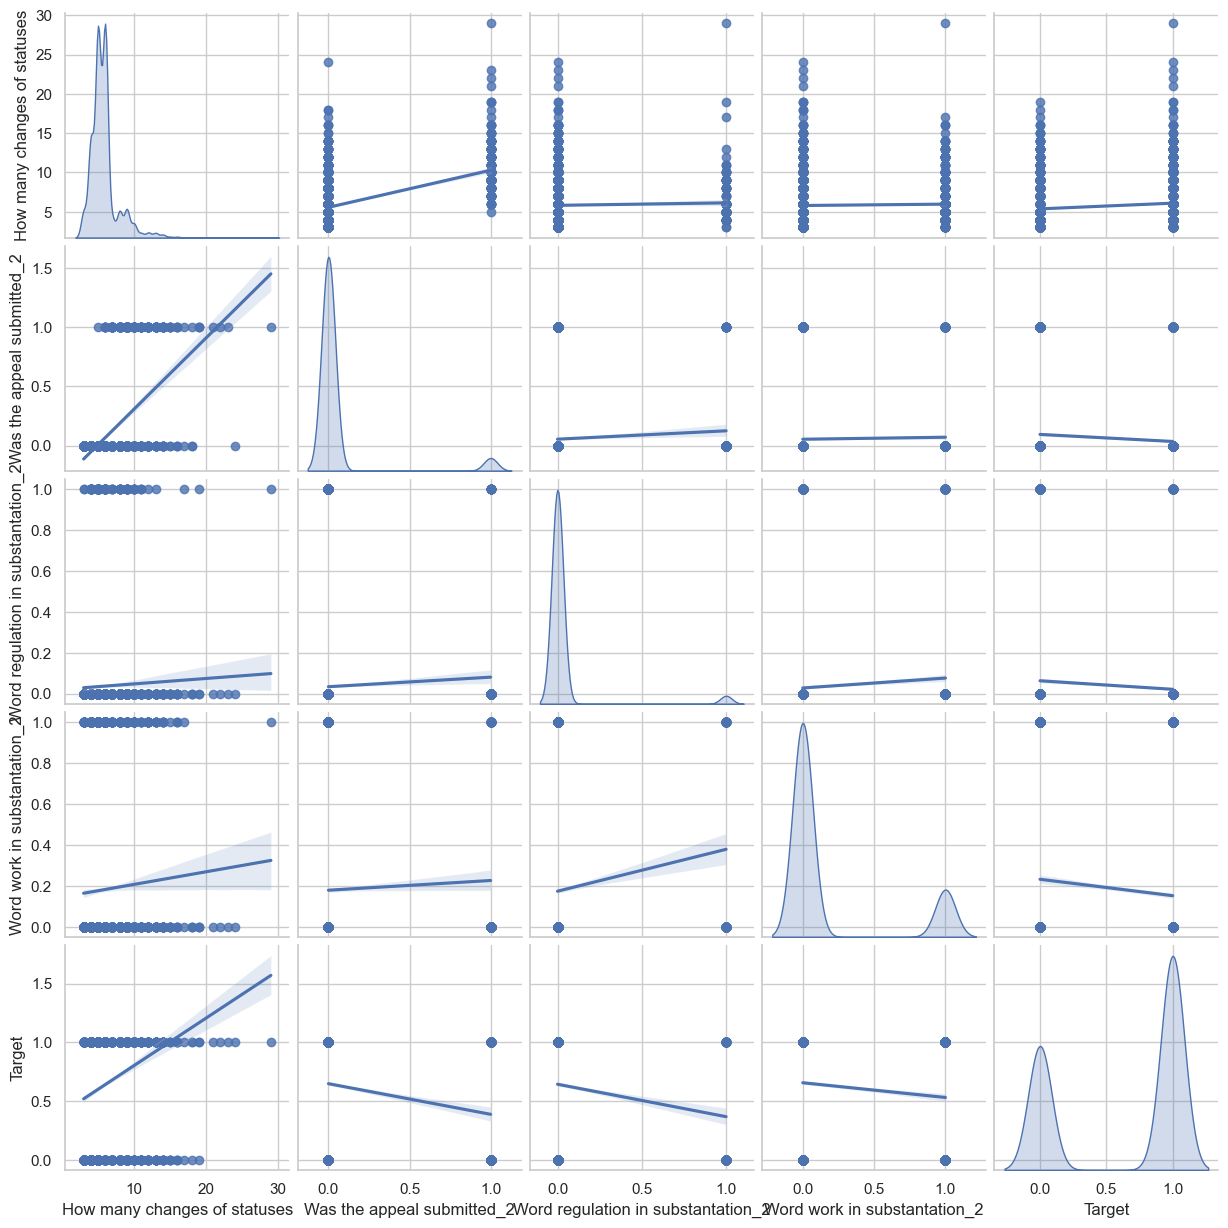

In [119]:

sns.pairplot(df_ogolny[ogolny_features+['Target']],diag_kind="kde", kind="reg")

Now I create new dataframe for application for targets and selected features

In [120]:
which_ogolny = ['How many changes of statuses',
 'Was the appeal submitted_2',
 'Word regulation in substantation_2',
 'Word work in substantation_2'] + ['Target']

which_ogolny

['How many changes of statuses',
 'Was the appeal submitted_2',
 'Word regulation in substantation_2',
 'Word work in substantation_2',
 'Target']

In [121]:
new_df_ogolny = df_ogolny[which_ogolny]
new_df_ogolny.head(3)

,How many changes of statuses,Was the appeal submitted_2,Word regulation in substantation_2,Word work in substantation_2,Target
0,6,0,0,1,1
17,6,0,0,0,1
25,9,0,0,0,1


## 'Podanie o rejestrację'

In [122]:
correlation = df_rejestracja.corr()['Target']
# correlation
correlation = correlation.abs().sort_values(ascending=False)
print(correlation)

Target                                            1.000000
ECTS in recent semester                           0.256625
Missing subjects from sem 1                       0.200688
Missing ECTS                                      0.195867
Missing subjects from sem 2                       0.187862
Total ECTS                                        0.184612
How many changes of statuses                      0.168433
Total missing subjects                            0.160053
Payment for repeated subjects                     0.147369
Language_2                                        0.139718
Word progress in substantation_2                  0.122883
Semester of study                                 0.117735
Was the appeal submitted_2                        0.110566
Thesis count                                      0.102792
Mode of study_2                                   0.101119
Missing subjects from sem 4                       0.094735
Word regulation in substantation_2                0.0764

I choose 7 features with highest correlations

In [123]:
rejestracja_features = correlation.index[1:8].tolist()
rejestracja_features

['ECTS in recent semester',
 'Missing subjects from sem 1',
 'Missing ECTS',
 'Missing subjects from sem 2',
 'Total ECTS',
 'How many changes of statuses',
 'Total missing subjects']

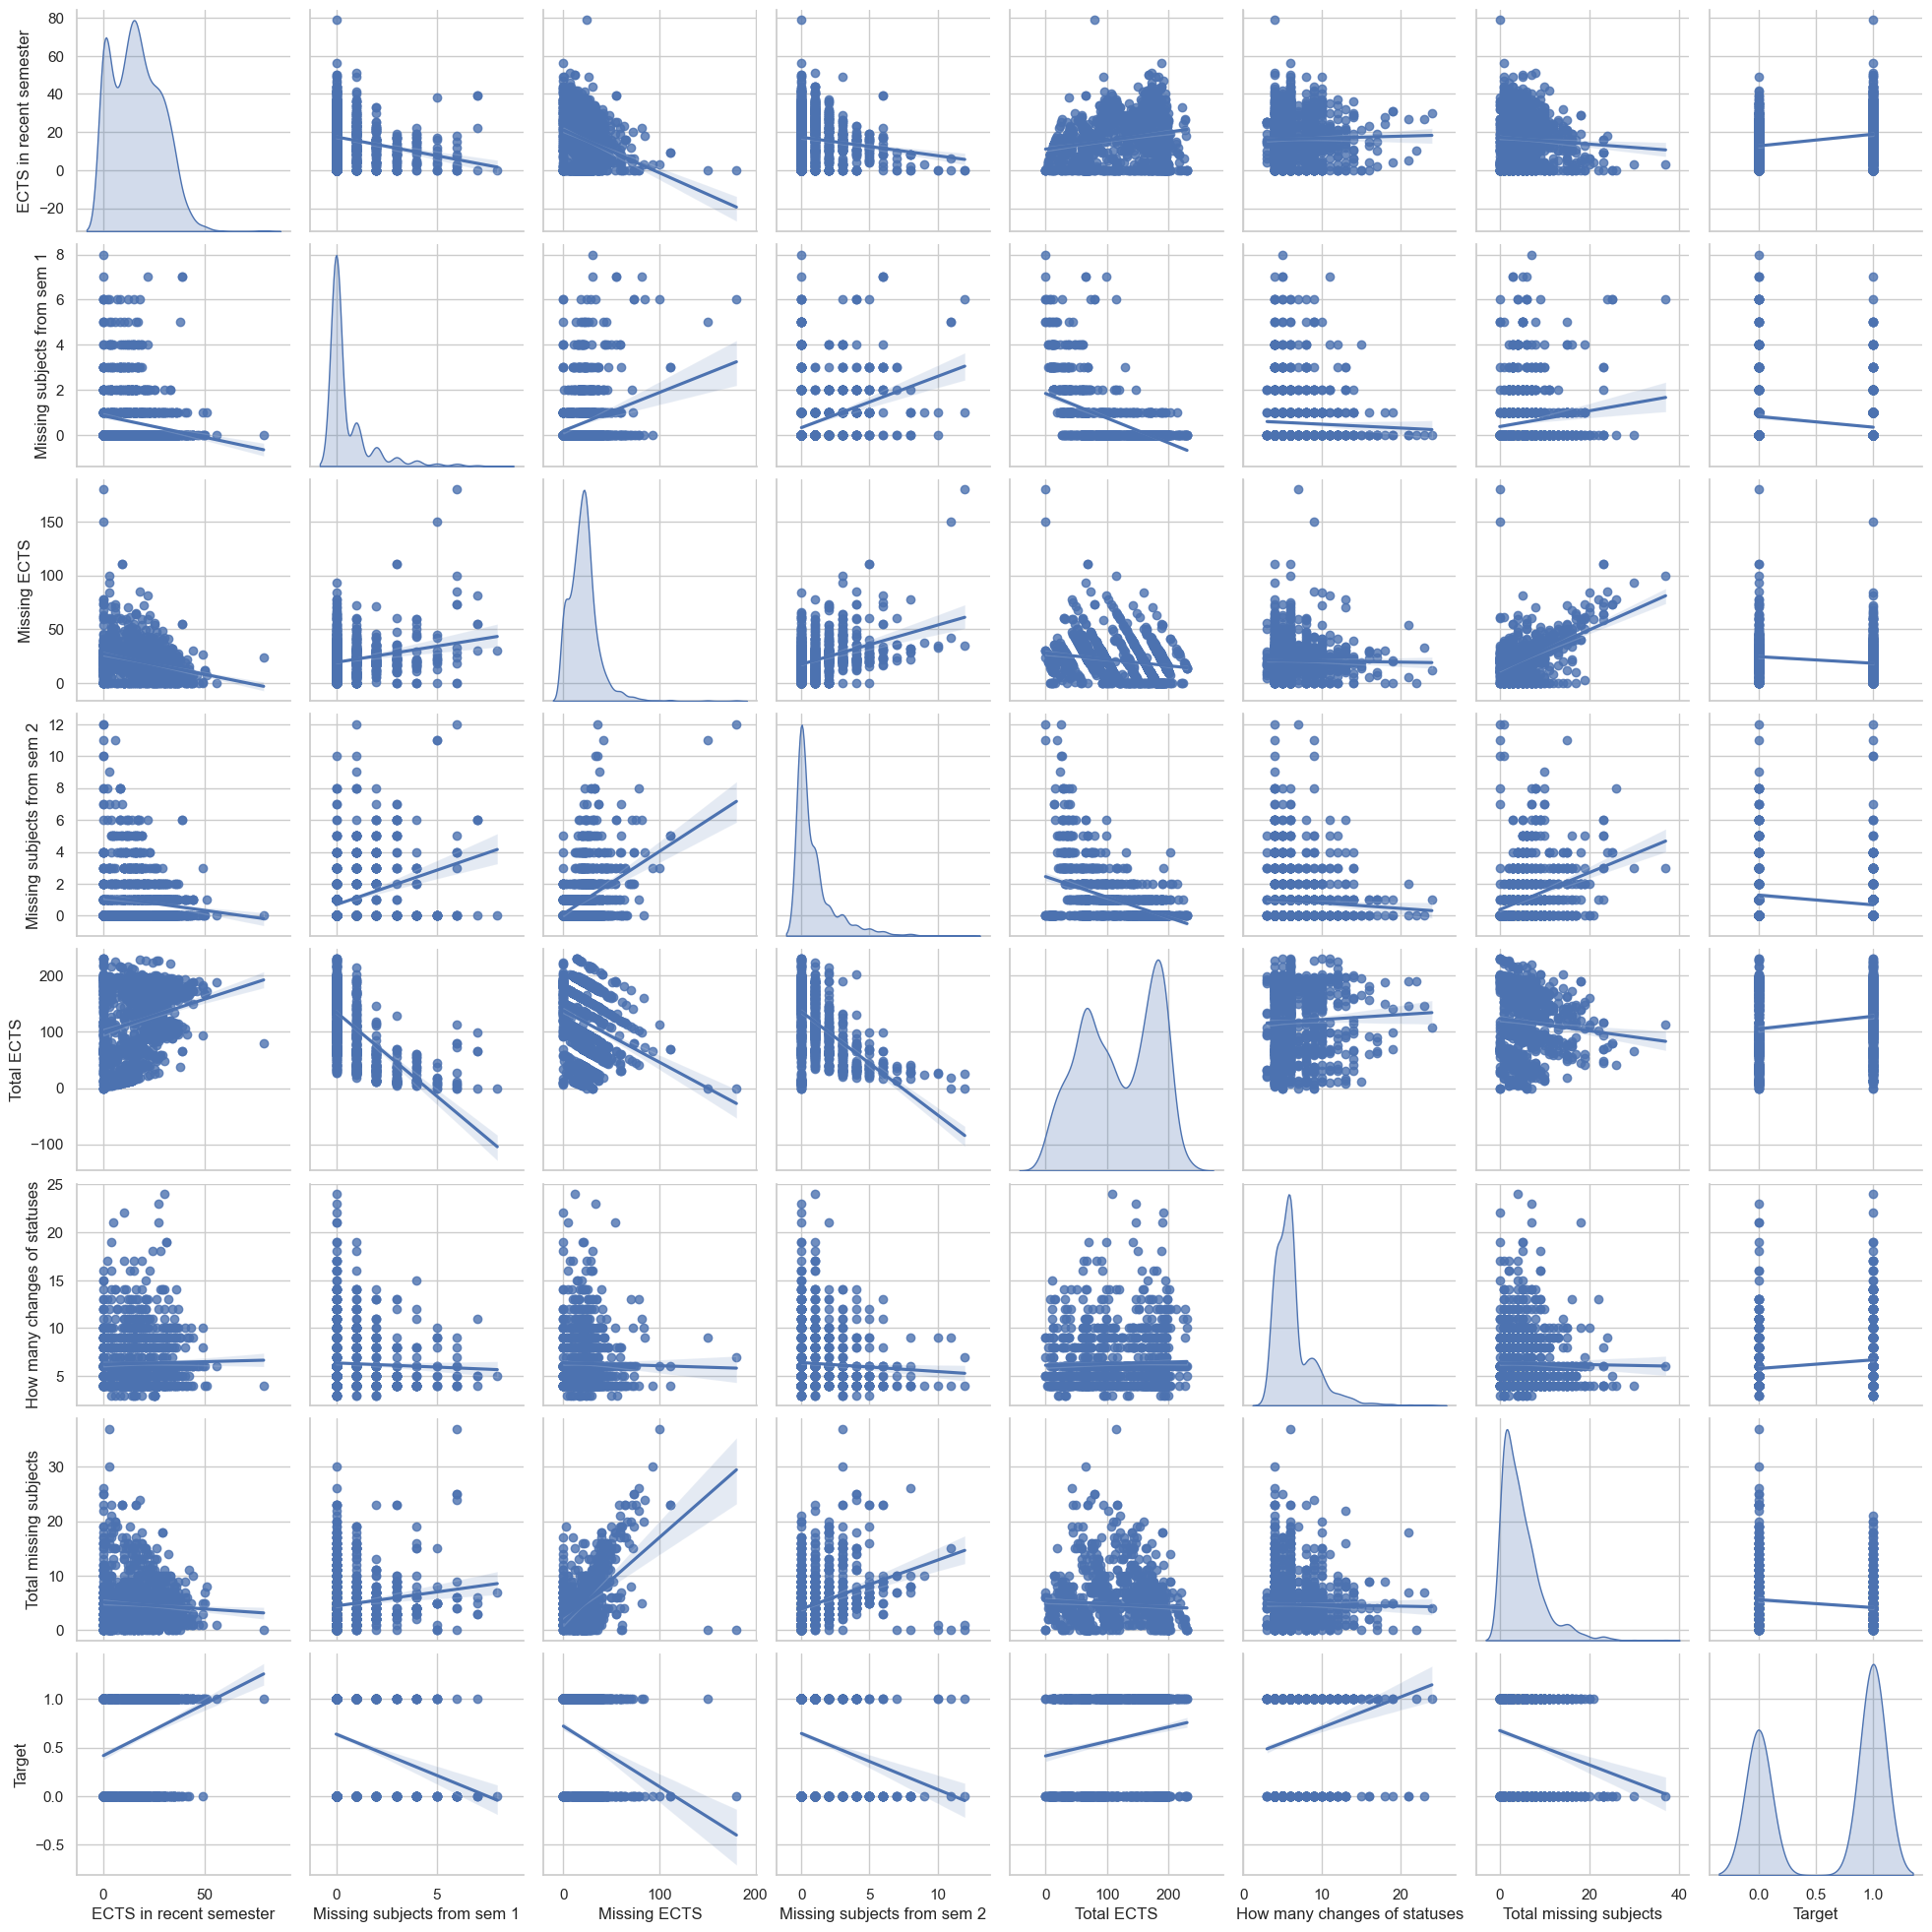

In [124]:
sns.pairplot(df_rejestracja[rejestracja_features+['Target']],diag_kind="kde", kind="reg")

Now I create new dataframe for application for targets and selected features

In [125]:
which_rejestracja = ['ECTS in recent semester',
 'Missing subjects from sem 1',
 'Missing ECTS',
 'Missing subjects from sem 2',
 'Total ECTS',
 'How many changes of statuses',
 'Total missing subjects'] + ['Target']

which_rejestracja

['ECTS in recent semester',
 'Missing subjects from sem 1',
 'Missing ECTS',
 'Missing subjects from sem 2',
 'Total ECTS',
 'How many changes of statuses',
 'Total missing subjects',
 'Target']

In [126]:
new_df_rejestracja = df_rejestracja[which_rejestracja]
new_df_rejestracja.head(3)

,ECTS in recent semester,Missing subjects from sem 1,Missing ECTS,Missing subjects from sem 2,Total ECTS,How many changes of statuses,Total missing subjects,Target
1,2,0,42,0,116,6,11,0
2,10,0,0,1,168,4,7,1
6,21,0,0,0,151,12,10,1


## 'Wniosek o rozłożenie opłaty za studia na raty'

In [127]:
correlation = df_raty.corr()['Target']
# correlation
correlation = correlation.abs().sort_values(ascending=False)
print(correlation)

Target                                            1.000000
Language_2                                        0.294195
Mode of study_2                                   0.291096
Attachments                                       0.240061
Word work in substantation_2                      0.177992
How many changes of statuses                      0.171438
ECTS in recent semester                           0.149522
Missing subjects from sem 1                       0.096392
Word family in substantation_2                    0.087791
Missing subjects from sem 3                       0.083998
Missing subjects from sem 4                       0.076834
Total ECTS                                        0.064271
Missing subjects from sem 2                       0.057893
Word promise  in substantation_2                  0.055233
Word health in substantation_2                    0.055233
Semester of study                                 0.054492
Missing ECTS                                      0.0532

I choose 6 features with highest correlations

In [128]:
raty_features = correlation.index[1:7].tolist()
raty_features

['Language_2',
 'Mode of study_2',
 'Attachments',
 'Word work in substantation_2',
 'How many changes of statuses',
 'ECTS in recent semester']

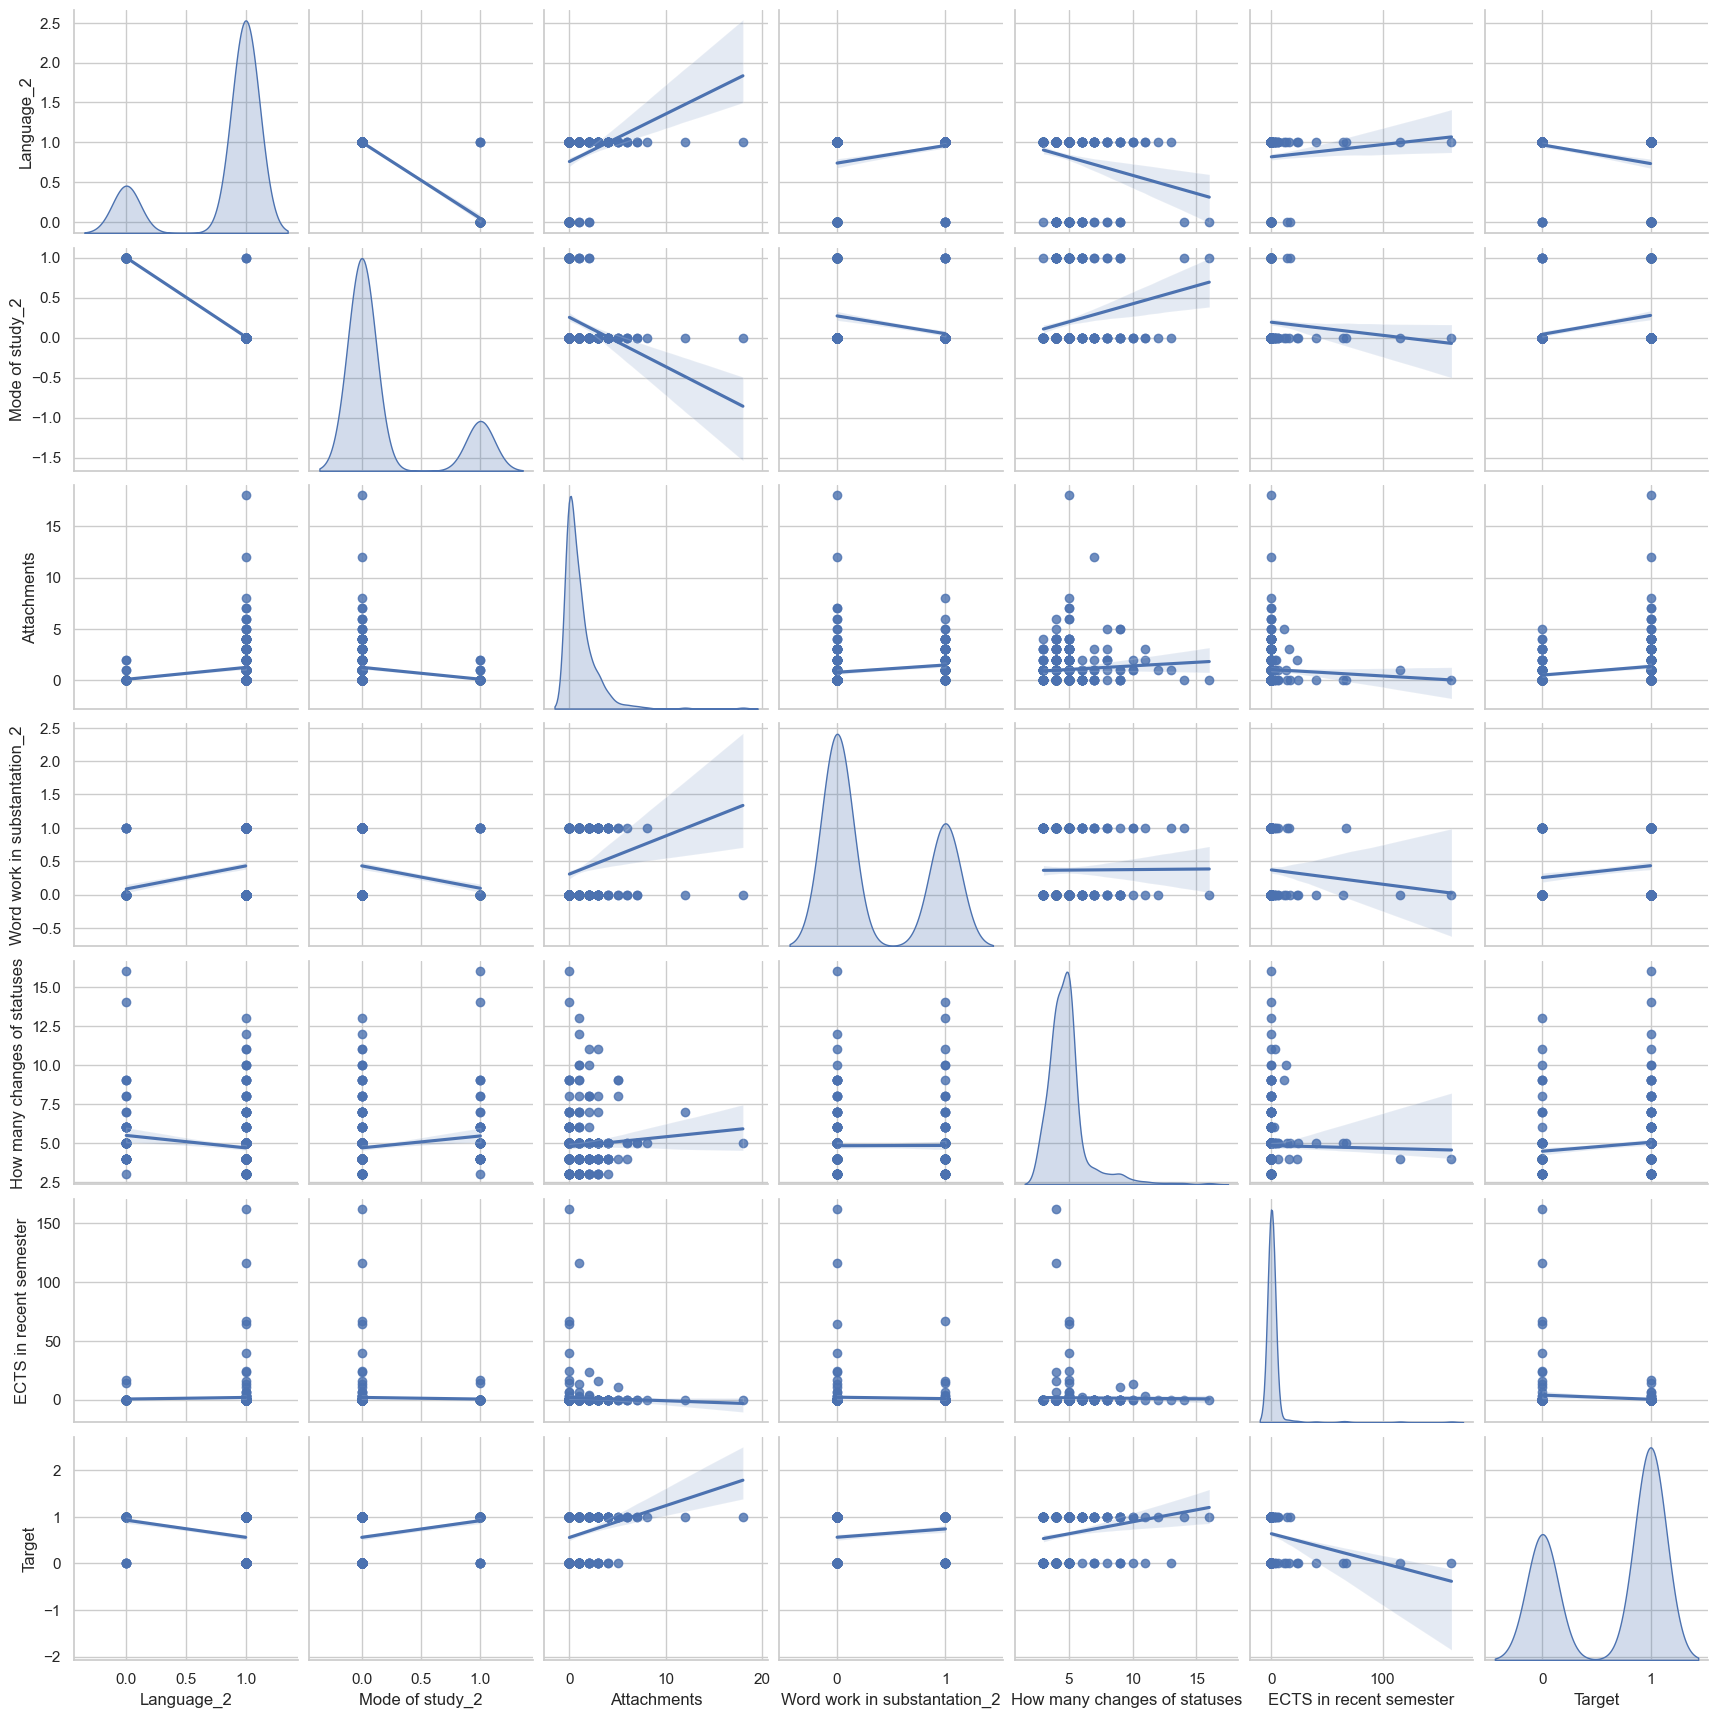

In [129]:
sns.pairplot(df_raty[raty_features+['Target']],diag_kind="kde", kind="reg")

Now I create new dataframe for application for targets and selected features

In [130]:
which_raty = ['Language_2',
 'Mode of study_2',
 'Attachments',
 'Word work in substantation_2',
 'How many changes of statuses',
 'ECTS in recent semester'] + ['Target']

which_raty

['Language_2',
 'Mode of study_2',
 'Attachments',
 'Word work in substantation_2',
 'How many changes of statuses',
 'ECTS in recent semester',
 'Target']

In [131]:
new_df_raty = df_raty[which_raty]
new_df_raty.head(3)

,Language_2,Mode of study_2,Attachments,Word work in substantation_2,How many changes of statuses,ECTS in recent semester,Target
12,1,0,0,0,3,0,0
295,1,0,2,1,3,0,1
326,1,0,0,0,3,0,0


## 'Wniosek o zmniejszenie opłaty za powtarzanie'

In [132]:
correlation = df_zmniejszenie.corr()['Target']
# correlation
correlation = correlation.abs().sort_values(ascending=False)
print(correlation)

Target                                            1.000000
Was the appeal submitted_2                        0.242887
Word health in substantation_2                    0.218621
How many changes of statuses                      0.214618
Language_2                                        0.178941
Word work in substantation_2                      0.169412
Word regulation in substantation_2                0.153925
Missing subjects from sem 5                       0.148446
Word family in substantation_2                    0.145338
Thesis count                                      0.136086
Mode of study_2                                   0.114656
Word family in substantation.1_2                  0.113792
Level of study (I - Engineering, M - Master)_2    0.112282
Missing ECTS                                      0.096863
Missing subjects from sem 1                       0.078347
Missing subjects from sem 2                       0.072167
Semester of study                                 0.0501

I choose 6 features with highest correlations

In [133]:
zmniejszenie_features = correlation.index[1:7].tolist()
zmniejszenie_features

['Was the appeal submitted_2',
 'Word health in substantation_2',
 'How many changes of statuses',
 'Language_2',
 'Word work in substantation_2',
 'Word regulation in substantation_2']

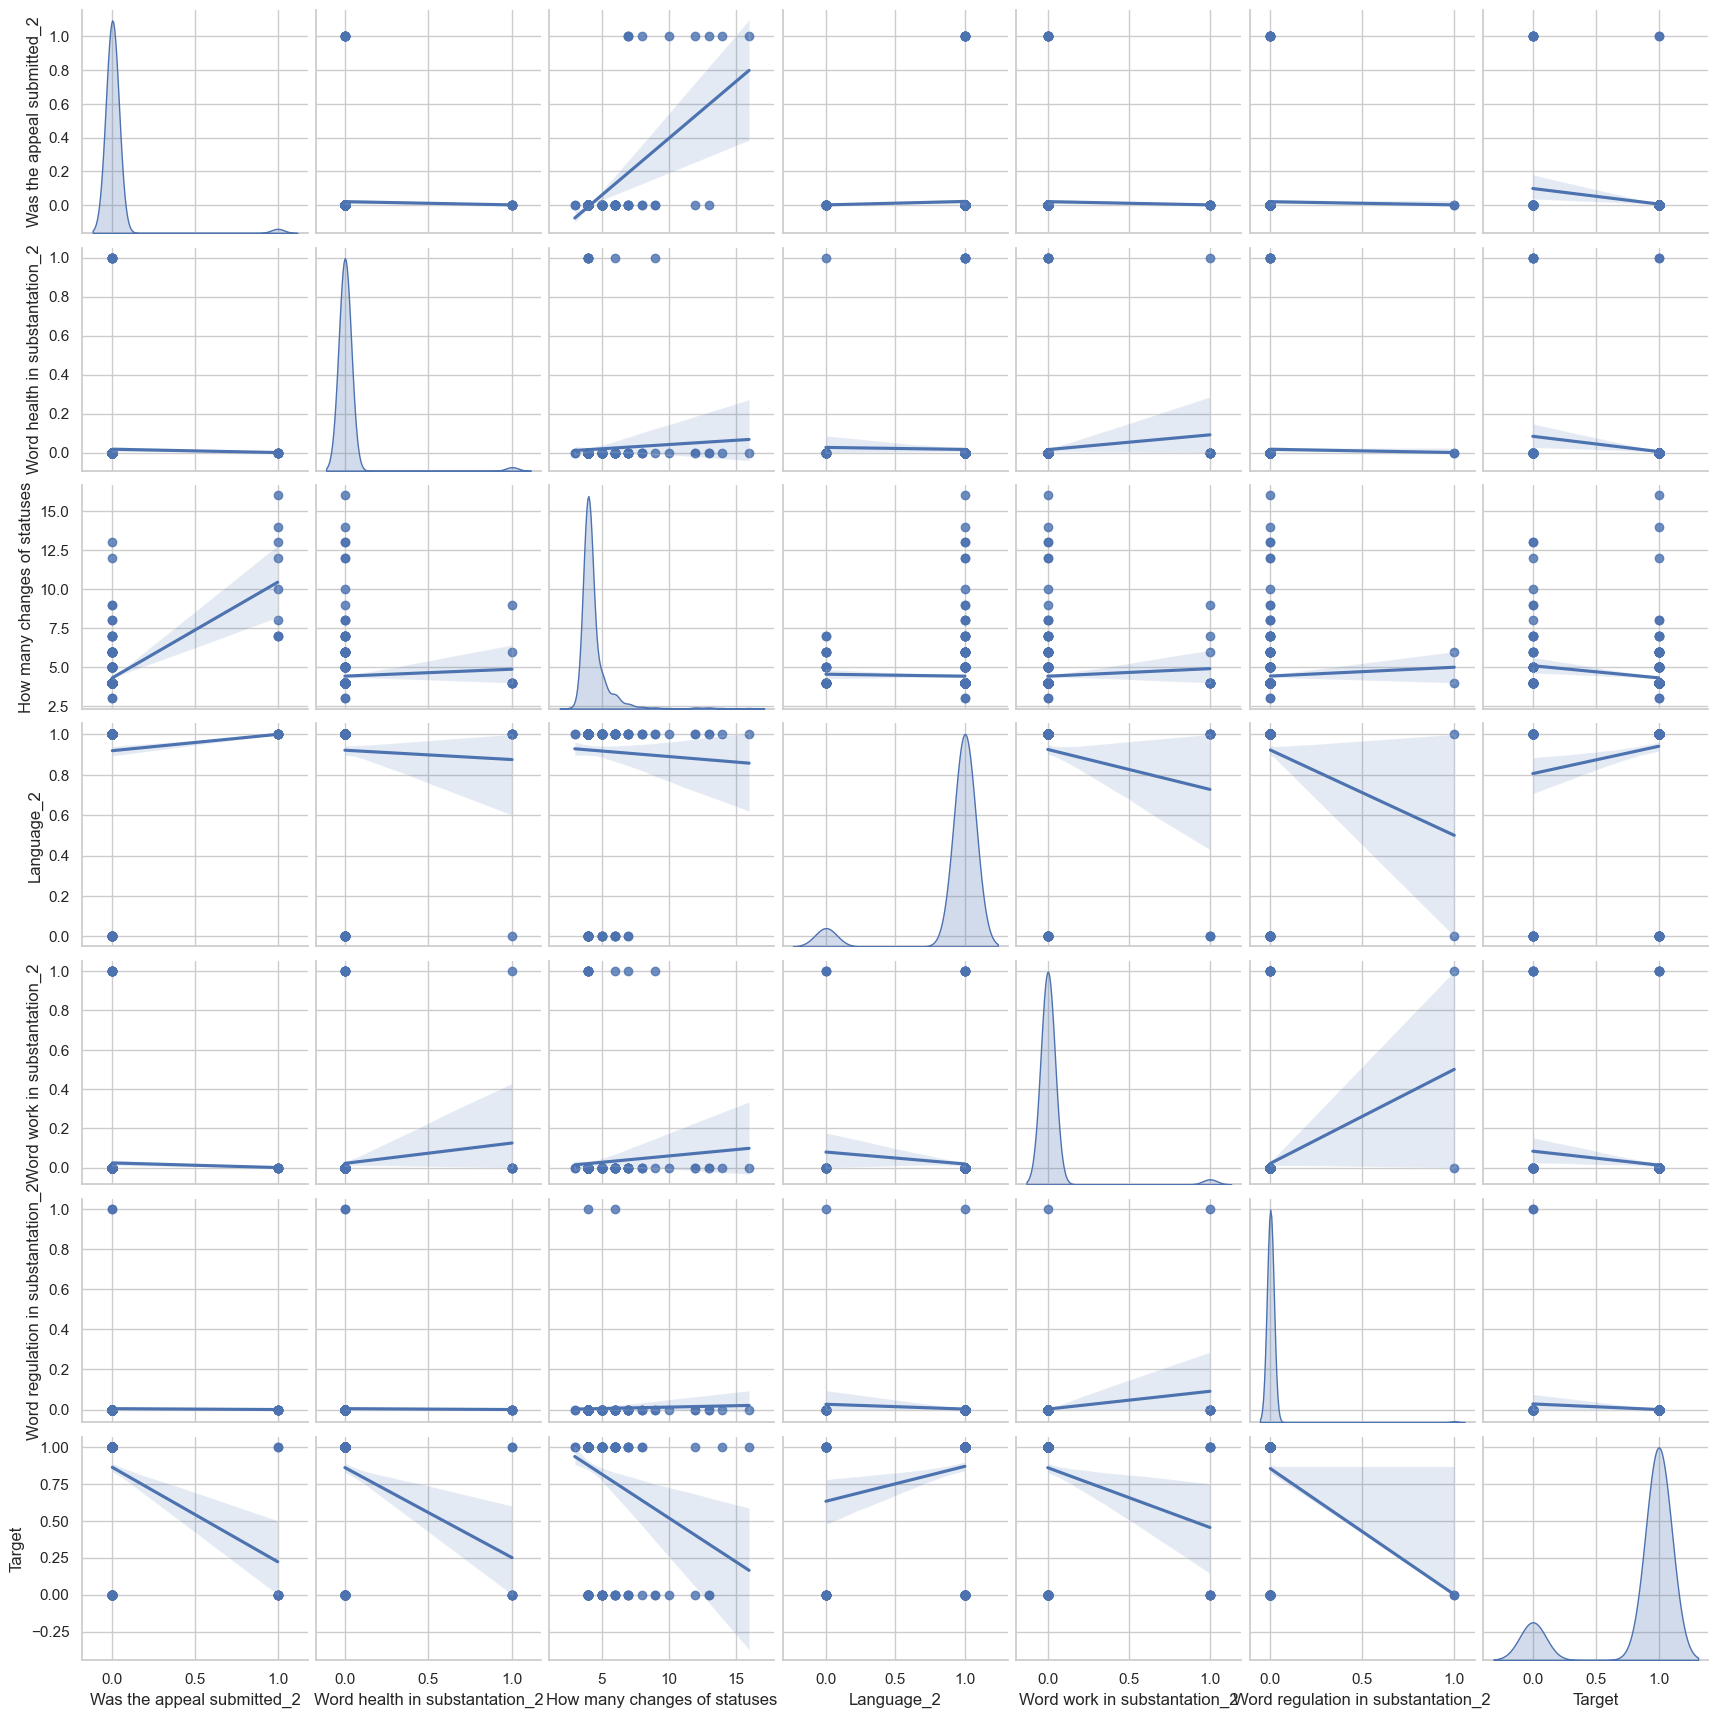

In [134]:
sns.pairplot(df_zmniejszenie[zmniejszenie_features+['Target']],diag_kind="kde", kind="reg")

Now I create new dataframe for application for targets and selected features

In [135]:
which_zmniejszenie = ['Was the appeal submitted_2',
 'Word health in substantation_2',
 'How many changes of statuses',
 'Language_2',
 'Word work in substantation_2',
 'Word regulation in substantation_2'] + ['Target']

which_zmniejszenie

['Was the appeal submitted_2',
 'Word health in substantation_2',
 'How many changes of statuses',
 'Language_2',
 'Word work in substantation_2',
 'Word regulation in substantation_2',
 'Target']

In [136]:
new_df_zmniejszenie = df_zmniejszenie[which_zmniejszenie]
new_df_zmniejszenie.head(3)

,Was the appeal submitted_2,Word health in substantation_2,How many changes of statuses,Language_2,Word work in substantation_2,Word regulation in substantation_2,Target
16,0,0,4,1,0,0,1
284,0,0,5,1,0,0,1
315,0,0,4,1,0,0,1


## 'Wniosek o przedłużenie terminu złożenia pracy dyplomowej'

In [137]:
correlation = df_przedluzenie.corr()['Target']
# correlation
correlation = correlation.abs().sort_values(ascending=False)
print(correlation)

Target                                            1.000000
Word regulation in substantation_2                0.854261
Level of thesis progress                          0.282039
Word progress in substantation_2                  0.213647
Total missing subjects                            0.205456
Payment for repeated subjects                     0.145023
Was the appeal submitted_2                        0.124096
Missing subjects from sem 5                       0.112833
ECTS in recent semester                           0.110056
Semester of study                                 0.105261
Level of study (I - Engineering, M - Master)_2    0.101731
Missing subjects from sem 1                       0.096555
Total ECTS                                        0.092628
Missing subjects from sem 4                       0.063374
Mode of study_2                                   0.058405
Language_2                                        0.053965
Missing subjects from sem 6                       0.0517

I choose 5 features with highest correlations

In [138]:
przedluzenie_features = correlation.index[1:6].tolist()
przedluzenie_features

['Word regulation in substantation_2',
 'Level of thesis progress',
 'Word progress in substantation_2',
 'Total missing subjects',
 'Payment for repeated subjects']

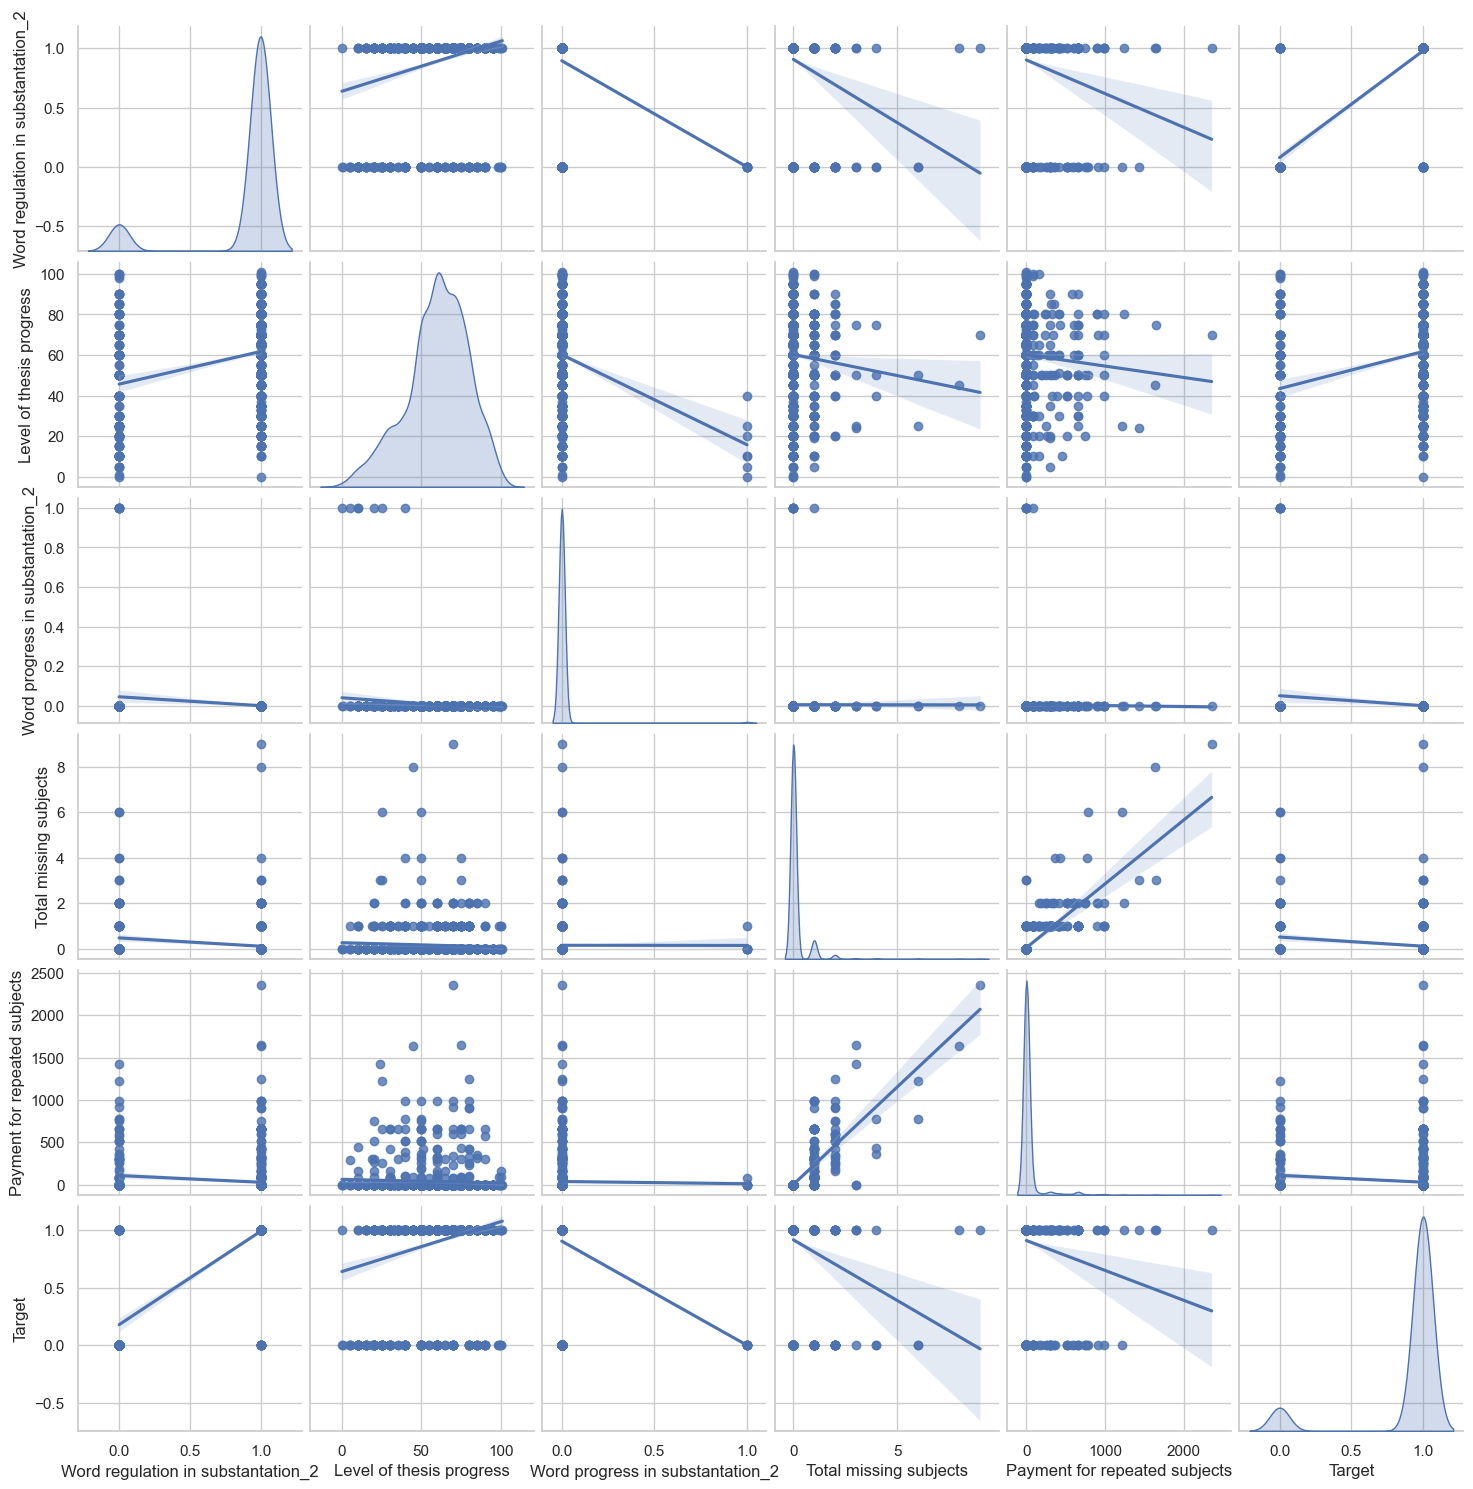

In [139]:
sns.pairplot(df_przedluzenie[przedluzenie_features+['Target']],diag_kind="kde", kind="reg")

Now I create new dataframe for application for targets and selected features

In [140]:
which_przedluzenie = ['Word regulation in substantation_2',
 'Level of thesis progress',
 'Word progress in substantation_2',
 'Total missing subjects',
 'Payment for repeated subjects'] + ['Target']

which_przedluzenie

['Word regulation in substantation_2',
 'Level of thesis progress',
 'Word progress in substantation_2',
 'Total missing subjects',
 'Payment for repeated subjects',
 'Target']

In [141]:
new_df_przedluzenie = df_przedluzenie[which_przedluzenie]
new_df_przedluzenie.head(3)

,Word regulation in substantation_2,Level of thesis progress,Word progress in substantation_2,Total missing subjects,Payment for repeated subjects,Target
261,1,80,0,2,900,1
415,1,70,0,0,0,1
423,0,50,0,6,780,0


## 'Wniosek o transfer przedmiotów'

In [142]:
correlation = df_transfer.corr()['Target']
# correlation
correlation = correlation.abs().sort_values(ascending=False)
print(correlation)

Target                                            1.000000
Level of study (I - Engineering, M - Master)_2    0.231589
Was the appeal submitted_2                        0.155350
Missing subjects from sem 1                       0.127488
Total ECTS                                        0.100870
Word work in substantation_2                      0.093974
Missing subjects from sem 6                       0.078302
Thesis count                                      0.070476
Word formal in substantation_2                    0.068533
Missing ECTS                                      0.058664
Missing subjects from sem 4                       0.058020
Total missing subjects                            0.057452
Semester of study                                 0.052812
Word family in substantation.1_2                  0.050439
ECTS in recent semester                           0.049217
Attachments                                       0.046862
Payment for repeated subjects                     0.0448

I choose 4 features with highest correlations

In [143]:
transfer_features = correlation.index[1:5].tolist()
transfer_features

['Level of study (I - Engineering, M - Master)_2',
 'Was the appeal submitted_2',
 'Missing subjects from sem 1',
 'Total ECTS']

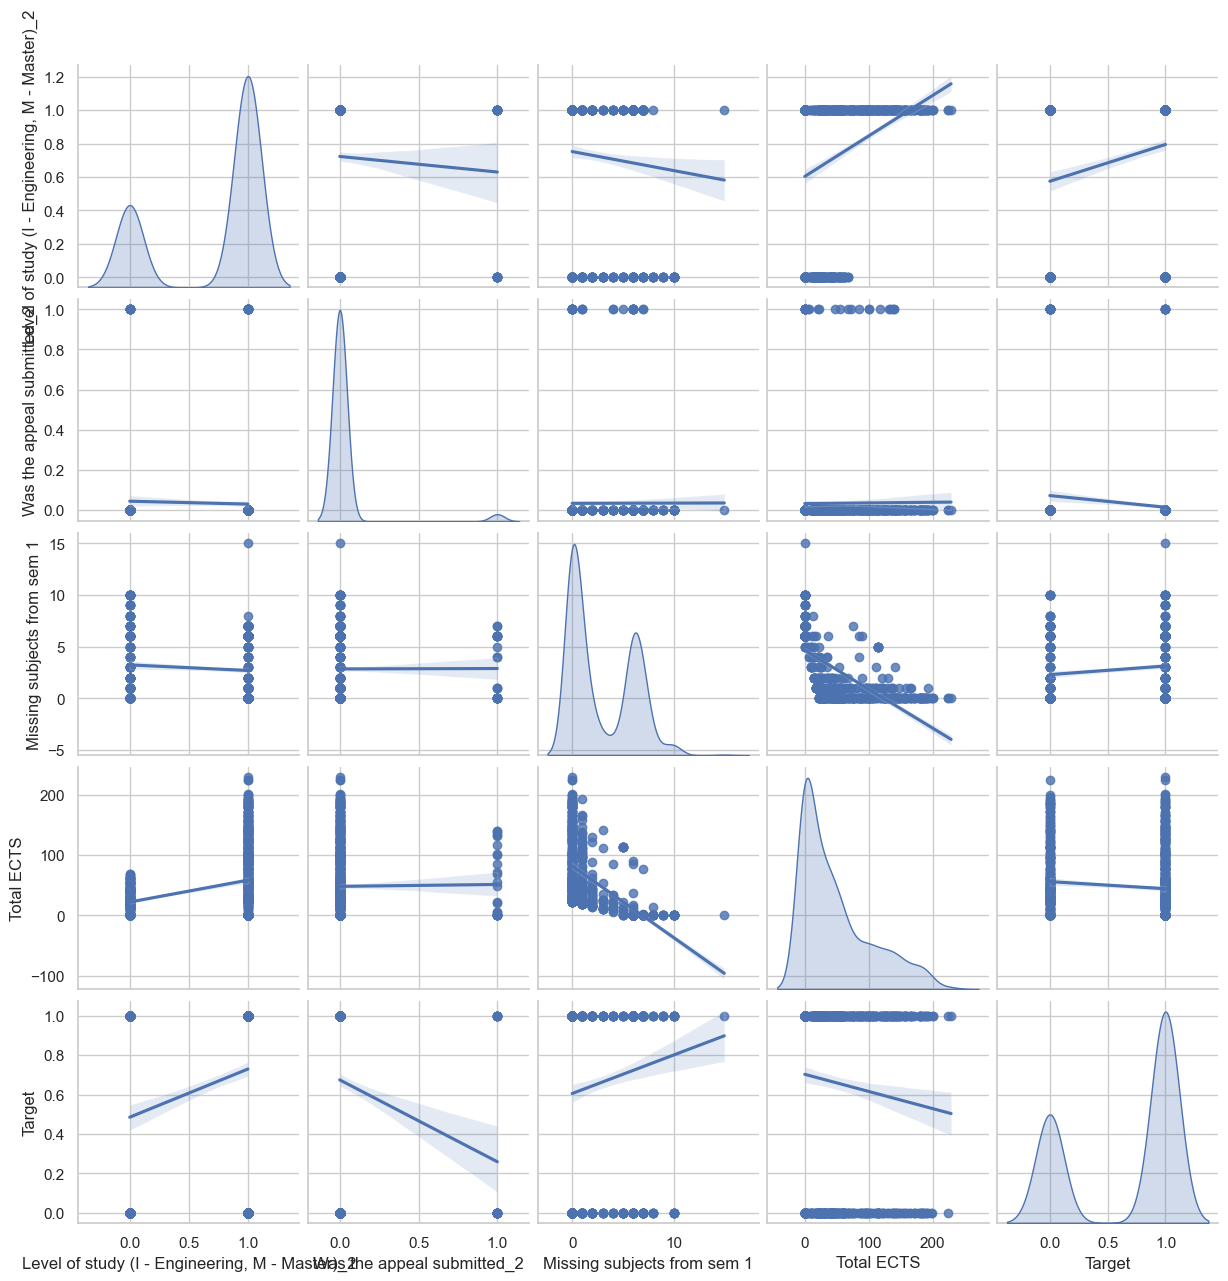

In [144]:
sns.pairplot(df_transfer[transfer_features+['Target']],diag_kind="kde", kind="reg")

In [145]:
# Creatin dataset for ML

Now I create new dataframe for application for targets and selected features

In [146]:
# df_transfer

which_transfer = ['Level of study (I - Engineering, M - Master)_2',
 'Was the appeal submitted_2',
 'Missing subjects from sem 1',
 'Total ECTS'] + ['Target']

which_transfer

['Level of study (I - Engineering, M - Master)_2',
 'Was the appeal submitted_2',
 'Missing subjects from sem 1',
 'Total ECTS',
 'Target']

In [147]:
new_df_transfer = df_transfer[which_transfer]

In [148]:
new_df_transfer.head(3)

,"Level of study (I - Engineering, M - Master)_2",Was the appeal submitted_2,Missing subjects from sem 1,Total ECTS,Target
1371,0,0,0,30,1
3602,1,0,6,0,1
3824,1,0,0,184,0


## Names of datasets for each applications

#### 'Wniosek ogólny'<br>
    new_df_ogolny
#### 'Podanie o rejestrację'<br>
    new_df_rejestracja
#### 'Wniosek o rozłożenie opłaty za studia na raty'<br>
    new_df_raty
#### 'Wniosek o zmniejszenie opłaty za powtarzanie'<br>
    new_df_zmniejszenie
#### 'Wniosek o przedłużenie terminu złożenia pracy dyplomowej'<br>
    new_df_przedluzenie
#### 'Wniosek o transfer przedmiotów'<br>
    new_df_transfer

#### Assignment to X and Y data:

#### X=new_df_przedluzenie.iloc[:,:-1]
#### Y=new_df_przedluzenie.iloc[:,-1]

# Models

## That's my function - Function comparing two models

In [176]:
def compare_models(model1, parameters1, model2, parameters2, X_train, y_train, X_test, y_test):
    # Grid search for model 1
    random_search1 = RandomizedSearchCV(model1, parameters1, n_iter=1, scoring='accuracy')
    random_search1.fit(X_train, y_train) 
    best_parameters1 = random_search1.best_params_
    best_model1 = random_search1.best_estimator_
    
    # Grid search for model 2
    random_search2 = RandomizedSearchCV(model2, parameters2, n_iter=1, scoring='accuracy')
    random_search2.fit(X_train, y_train) 
    best_parameters2 = random_search2.best_params_
    best_model2 = random_search2.best_estimator_

    # Model 1 Performance Evaluation
    y_pred1 = best_model1.predict(X_test)
    raport1 = classification_report(y_test, y_pred1)
    print("Model 1:\n")
    print("Best parameters:\n")
    for key, value in best_parameters1.items():
        print(f"{key}: {value}")
    print("\n",raport1)
    

    
    # Model Performance Evaluation 2
    y_pred2 = best_model2.predict(X_test)
    raport2 = classification_report(y_test, y_pred2)
    print("Model 2:\n")
    print("Best parameters:\n")
    for key, value in best_parameters2.items():
        print(f"{key}: {value}")
    print("\n",raport2)


    # Calculate metric values
    accuracy1 = accuracy_score(y_test, y_pred1)
    accuracy2 = accuracy_score(y_test, y_pred2)
    precision1, recall1, f1_score1, support1 = precision_recall_fscore_support(y_test, y_pred1, average='macro')
    precision2, recall2, f1_score2, support2 = precision_recall_fscore_support(y_test, y_pred2, average='macro')
    

    # Displaying confusion matrix for model 1
    cm1 = confusion_matrix(y_test, y_pred1)

    # Displaying confusion matrix for model 2
    cm2 = confusion_matrix(y_test, y_pred2)

    # Create a chart area with two sub-areas
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Displaying confusion matrix for model 1
    sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax1)
    ax1.set_title('Confusion Matrix - Model 1')
    ax1.set_xlabel('Predicted')
    ax1.set_ylabel('True')

    # Displaying confusion matrix for model 2
    sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax2)
    ax2.set_title('Confusion Matrix - Model 2')
    ax2.set_xlabel('Predicted')
    ax2.set_ylabel('True')

    # Display both confusion matrices side by side
    plt.tight_layout()
    plt.show()
    
    # Displaying a report using a bar chart
    labels = ['Precision', 'Recall', 'F1-score', 'Accuracy']
    values1 = [precision1, recall1, f1_score1, accuracy1]
    values2 = [precision2, recall2, f1_score2, accuracy2]
    
    ##############EDIT##################
    metric_list_1 = [precision1, recall1, f1_score1, accuracy1]
    metric_list_2 = [precision2, recall2, f1_score2, accuracy2]
    ####################################
    
    #     Bar plot
    plt.figure(figsize=(10, 6))
    bar_width = 0.35
    index = np.arange(len(labels))

    plt.bar(index, values1, bar_width, label='Model 1')
    plt.bar(index + bar_width, values2, bar_width, label='Model 2')

    plt.xlabel('Metrics')
    plt.ylabel('Value')
    plt.title('Performance metrics comparison')
    plt.xticks(index + bar_width / 2, labels)
    plt.legend()
    plt.show()
    
    
    # Returning the best parameters and models for further use
    return best_parameters1, best_model1, best_parameters2, best_model2, metric_list_1, metric_list_2


# That's my model

In [181]:
lr = LogisticRegression(solver='liblinear', random_state=1)
rf = RandomForestClassifier(max_features=None, random_state=1)
nb = MultinomialNB()

model1 = VotingClassifier(
    [
        ('clf1', lr), ('clf2', rf), ('clf3', nb)
    ],
    voting='soft'
)

parameters1 = {'voting':['hard', 'soft'],# Types of voting
          'weights':[(1,1,1), (2,1,1), (1,2,1), (1,1,2)]}# Weights for soft voting

model2 = StackingClassifier(
    [
        ('clf1', lr), ('clf2', rf), ('clf3', nb)
    ],
    final_estimator=LogisticRegression()
)

parameters2 = {
    'final_estimator__C': [0.1, 1, 10],
}


# Lists for metrics

In [182]:
all_metric_list_1 = []
all_metric_list_2 = []

# RESULTS

# 'Wniosek ogólny'

In [183]:
X=new_df_ogolny.iloc[:,:-1]
Y=new_df_ogolny.iloc[:,-1]

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

Model 1:

Best parameters:

weights: (2, 1, 1)
voting: soft

               precision    recall  f1-score   support

           0       0.65      0.36      0.46       501
           1       0.71      0.89      0.79       892

    accuracy                           0.70      1393
   macro avg       0.68      0.62      0.63      1393
weighted avg       0.69      0.70      0.67      1393

Model 2:

Best parameters:

final_estimator__C: 0.1

               precision    recall  f1-score   support

           0       0.68      0.36      0.47       501
           1       0.72      0.90      0.80       892

    accuracy                           0.71      1393
   macro avg       0.70      0.63      0.63      1393
weighted avg       0.70      0.71      0.68      1393



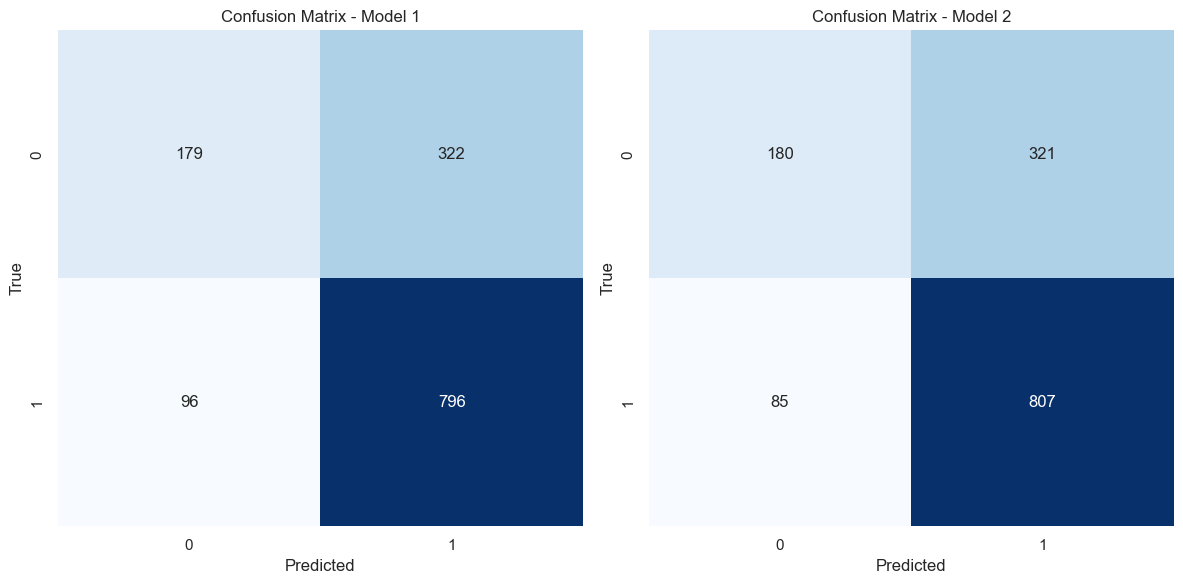

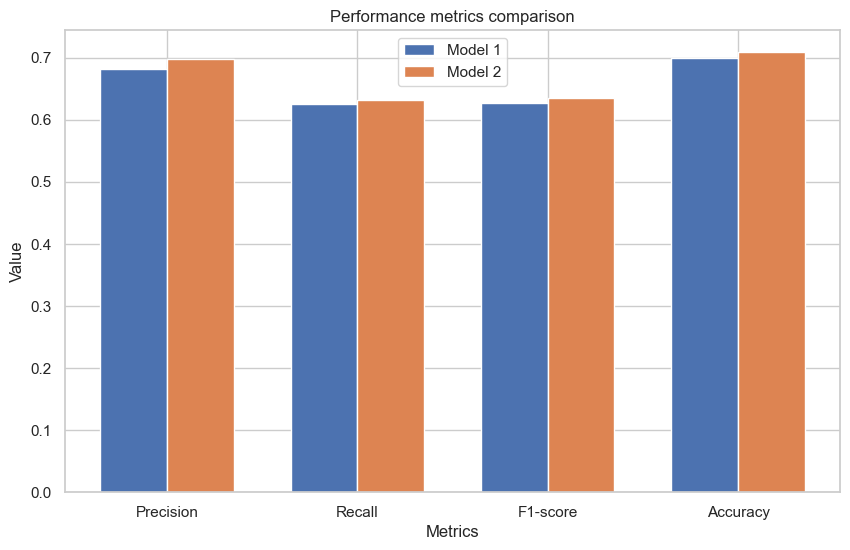

In [184]:
best_parameters_ogolny, best_model_ogolny, best_parameters2_ogolny, best_model2_ogolny, metric_list_1,metric_list_2 = compare_models(model1, parameters1, model2, parameters2, X_train, y_train, X_test, y_test)
all_metric_list_1.append(metric_list_1)
all_metric_list_2.append(metric_list_2)

# 'Podanie o rejestrację'

In [154]:
X=new_df_rejestracja.iloc[:,:-1]
Y=new_df_rejestracja.iloc[:,-1]

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

Model 1:

Best parameters:

weights: (2, 1, 1)
voting: hard

               precision    recall  f1-score   support

           0       0.58      0.52      0.55       168
           1       0.71      0.76      0.74       261

    accuracy                           0.67       429
   macro avg       0.65      0.64      0.64       429
weighted avg       0.66      0.67      0.66       429

Model 2:

Best parameters:

final_estimator__C: 10

               precision    recall  f1-score   support

           0       0.75      0.68      0.71       168
           1       0.80      0.85      0.83       261

    accuracy                           0.78       429
   macro avg       0.77      0.76      0.77       429
weighted avg       0.78      0.78      0.78       429



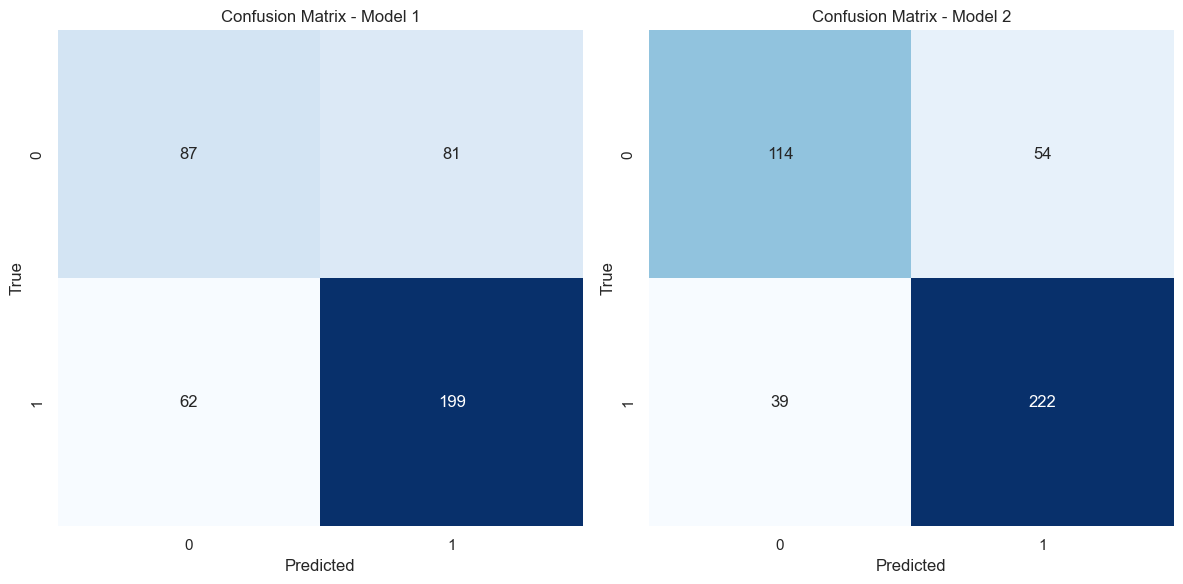

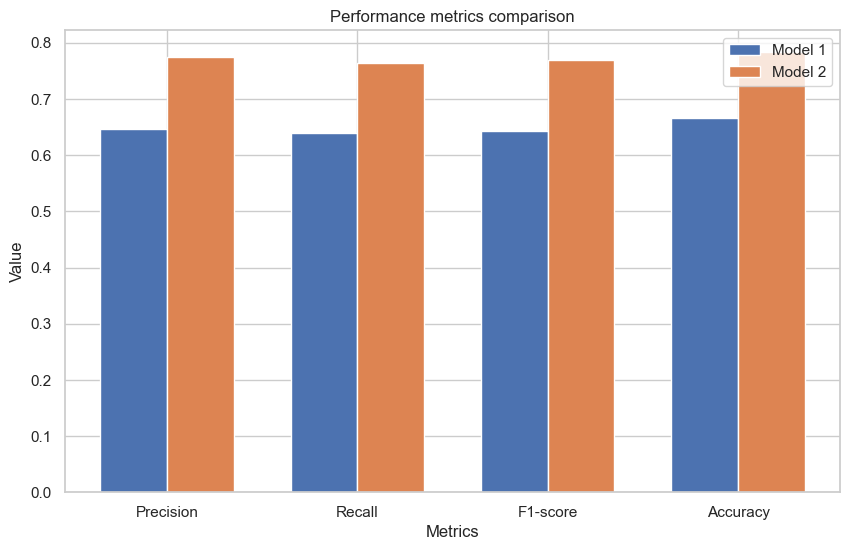

In [155]:
best_parameters_rejestracja, best_model_rejestracja, best_parameters2_rejestracja, best_model2_rejestracja, metric_list_1,metric_list_2 = compare_models(model1, parameters1, model2, parameters2, X_train, y_train, X_test, y_test)
all_metric_list_1.append(metric_list_1)
all_metric_list_2.append(metric_list_2)

# 'Wniosek o rozłożenie opłaty za studia na raty'

In [156]:
X=new_df_raty.iloc[:,:-1]
Y=new_df_raty.iloc[:,-1]

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

Model 1:

Best parameters:

weights: (1, 2, 1)
voting: soft

               precision    recall  f1-score   support

           0       0.69      0.66      0.67        44
           1       0.80      0.82      0.81        73

    accuracy                           0.76       117
   macro avg       0.75      0.74      0.74       117
weighted avg       0.76      0.76      0.76       117

Model 2:

Best parameters:

final_estimator__C: 1

               precision    recall  f1-score   support

           0       0.65      0.73      0.69        44
           1       0.82      0.77      0.79        73

    accuracy                           0.75       117
   macro avg       0.74      0.75      0.74       117
weighted avg       0.76      0.75      0.75       117



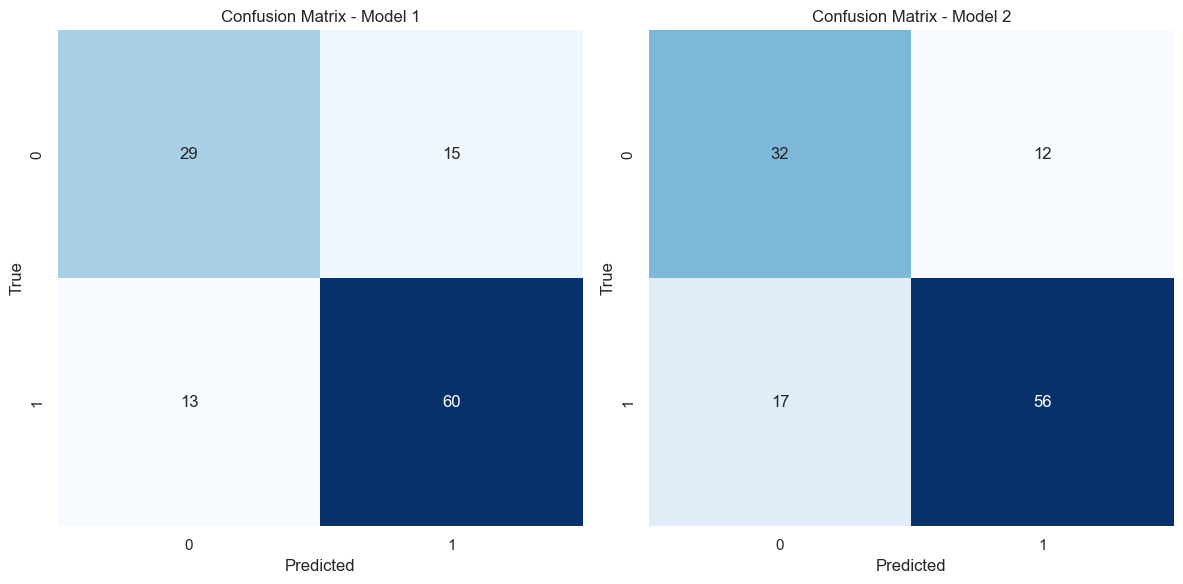

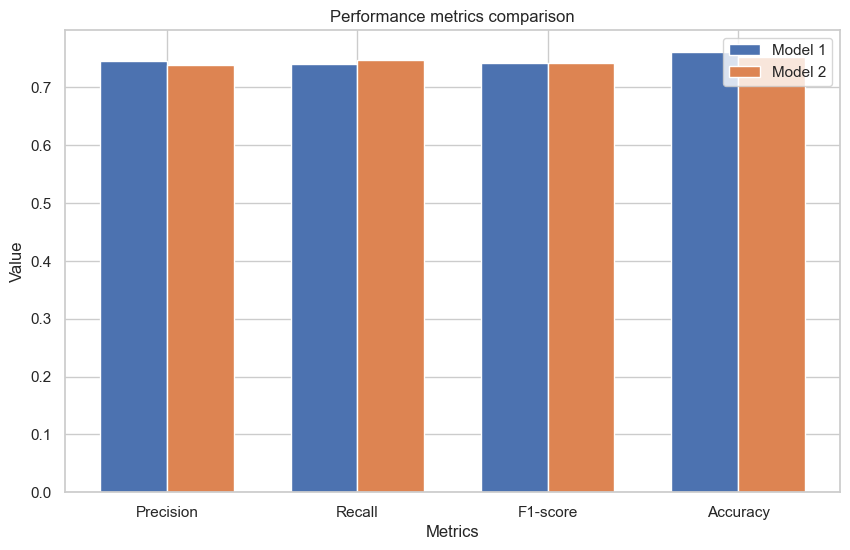

In [157]:
best_parameters_raty, best_model_raty, best_parameters2_raty, best_model2_raty,metric_list_1,metric_list_2 = compare_models(model1, parameters1, model2, parameters2, X_train, y_train, X_test, y_test)
all_metric_list_1.append(metric_list_1)
all_metric_list_2.append(metric_list_2)


# 'Wniosek o zmniejszenie opłaty za powtarzanie'

In [158]:
X=new_df_zmniejszenie.iloc[:,:-1]
Y=new_df_zmniejszenie.iloc[:,-1]

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

Model 1:

Best parameters:

weights: (1, 1, 1)
voting: soft

               precision    recall  f1-score   support

           0       0.50      0.22      0.31        18
           1       0.90      0.97      0.93       126

    accuracy                           0.88       144
   macro avg       0.70      0.60      0.62       144
weighted avg       0.85      0.88      0.85       144

Model 2:

Best parameters:

final_estimator__C: 10

               precision    recall  f1-score   support

           0       0.44      0.22      0.30        18
           1       0.90      0.96      0.93       126

    accuracy                           0.87       144
   macro avg       0.67      0.59      0.61       144
weighted avg       0.84      0.87      0.85       144



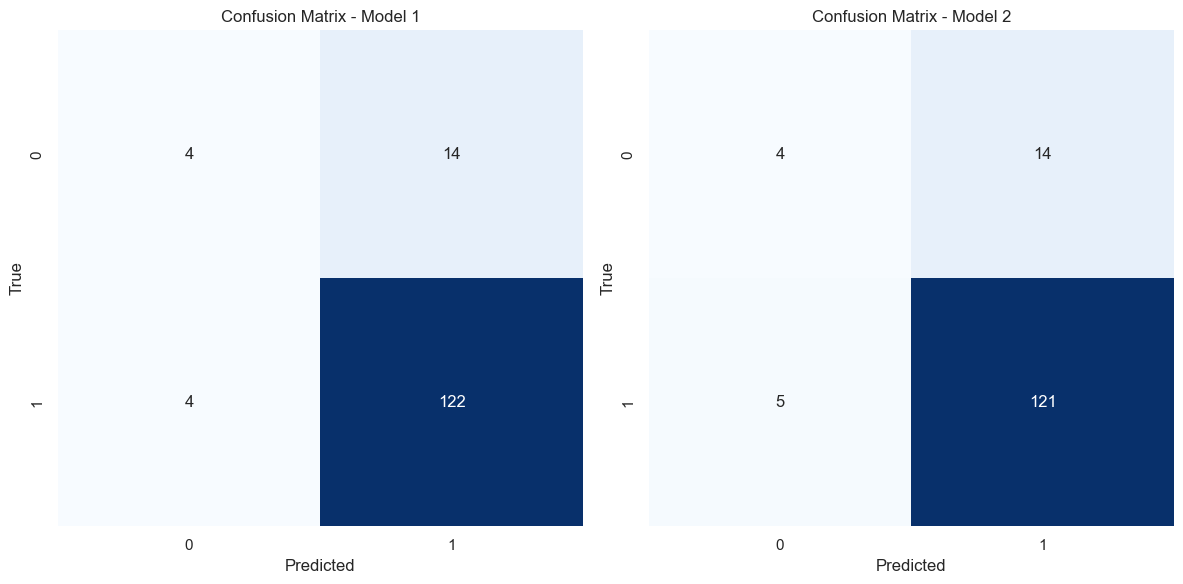

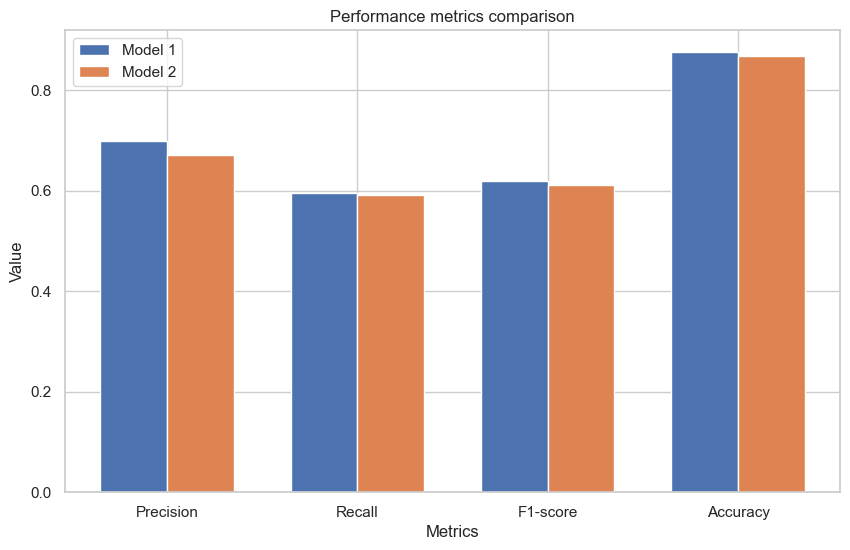

In [159]:
best_parameters_zmniejszenie, best_model_zmniejszenie, best_parameters2_zmniejszenie, best_model2_zmniejszenie,metric_list_1,metric_list_2 = compare_models(model1, parameters1, model2, parameters2, X_train, y_train, X_test, y_test)
all_metric_list_1.append(metric_list_1)
all_metric_list_2.append(metric_list_2)


# 'Wniosek o przedłużenie terminu złożenia pracy dyplomowej'

In [160]:
X=new_df_przedluzenie.iloc[:,:-1]
Y=new_df_przedluzenie.iloc[:,-1]

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

Model 1:

Best parameters:

weights: (1, 2, 1)
voting: hard

               precision    recall  f1-score   support

           0       0.75      0.87      0.80        38
           1       0.99      0.97      0.98       388

    accuracy                           0.96       426
   macro avg       0.87      0.92      0.89       426
weighted avg       0.97      0.96      0.96       426

Model 2:

Best parameters:

final_estimator__C: 10

               precision    recall  f1-score   support

           0       0.75      0.87      0.80        38
           1       0.99      0.97      0.98       388

    accuracy                           0.96       426
   macro avg       0.87      0.92      0.89       426
weighted avg       0.97      0.96      0.96       426



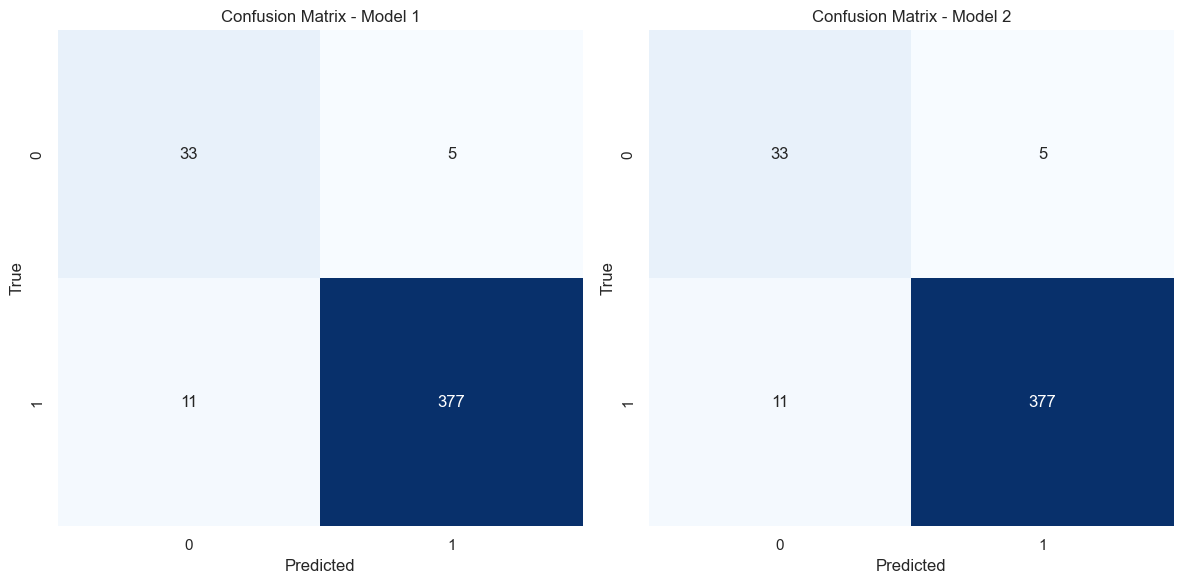

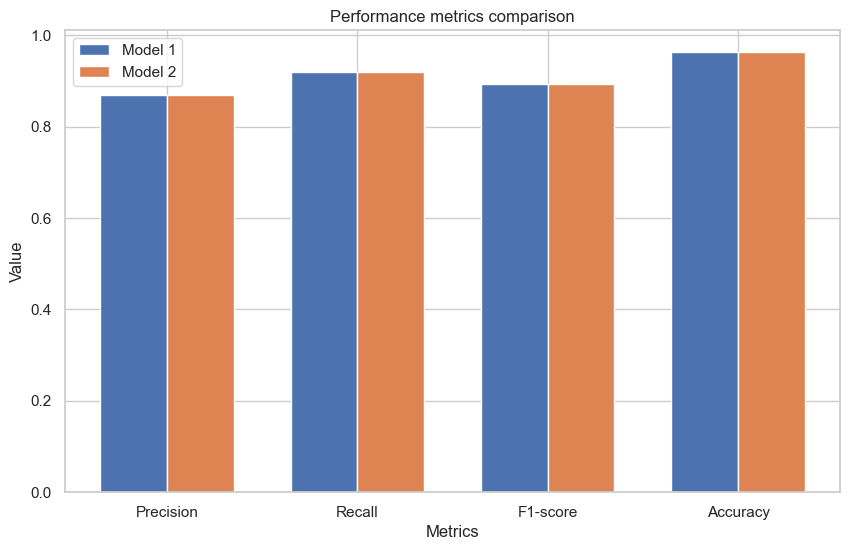

In [161]:
best_parameters_przedluzenie, best_model_przedluzenie, best_parameters2_przedluzenie, best_model2_przedluzenie,metric_list_1,metric_list_2 = compare_models(model1, parameters1, model2, parameters2, X_train, y_train, X_test, y_test)
all_metric_list_1.append(metric_list_1)
all_metric_list_2.append(metric_list_2)


# 'Wniosek o transfer przedmiotów'

In [162]:
X=new_df_transfer.iloc[:,:-1]
Y=new_df_transfer.iloc[:,-1]

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

Model 1:

Best parameters:

weights: (1, 1, 2)
voting: hard

               precision    recall  f1-score   support

           0       0.43      0.70      0.53        77
           1       0.82      0.59      0.68       173

    accuracy                           0.62       250
   macro avg       0.62      0.65      0.61       250
weighted avg       0.70      0.62      0.64       250

Model 2:

Best parameters:

final_estimator__C: 1

               precision    recall  f1-score   support

           0       0.51      0.31      0.39        77
           1       0.74      0.87      0.80       173

    accuracy                           0.70       250
   macro avg       0.62      0.59      0.59       250
weighted avg       0.67      0.70      0.67       250



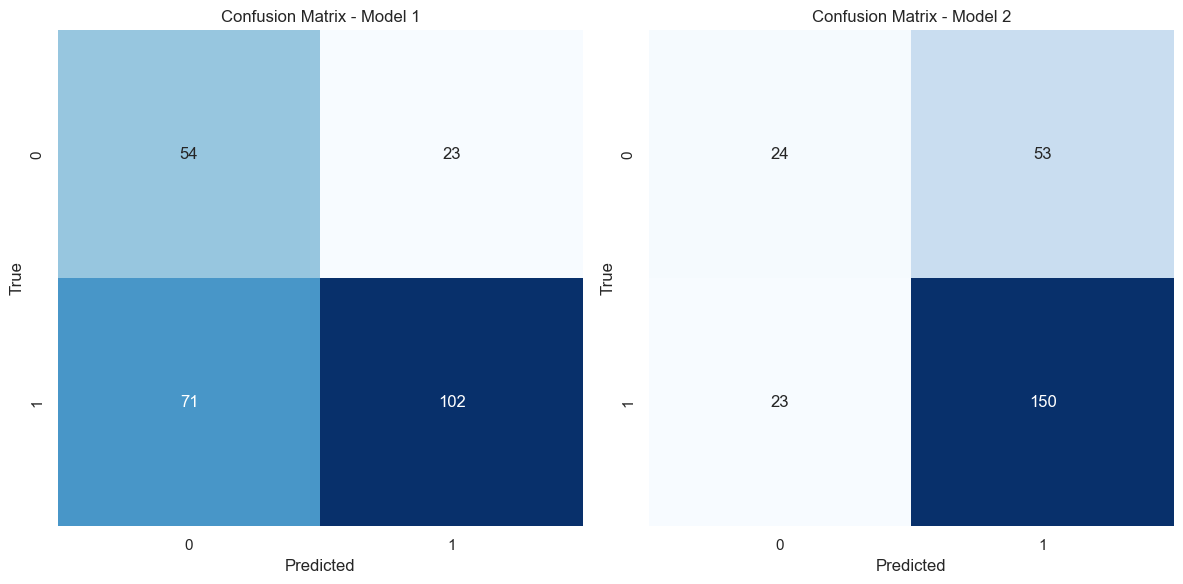

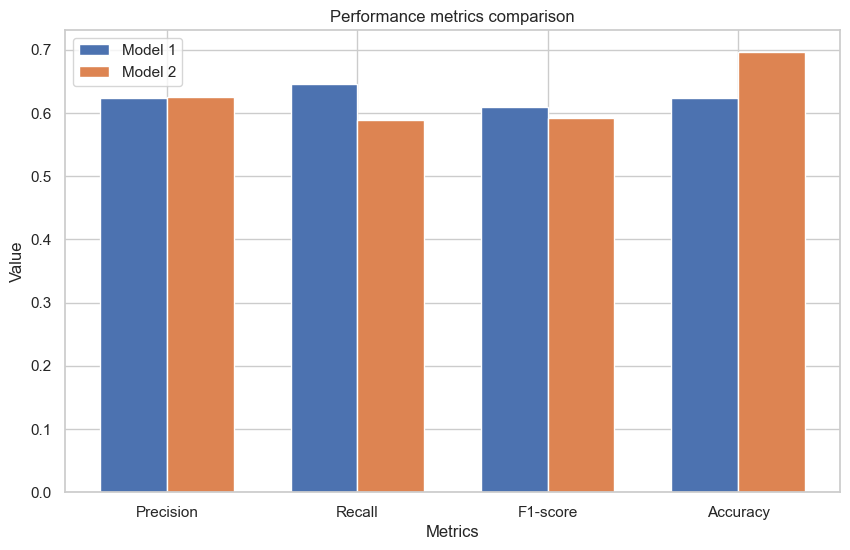

In [163]:
best_parameters_transfer, best_model_transfer, best_parameters2_transfer, best_model2_transfer,metric_list_1,metric_list_2 = compare_models(model1, parameters1, model2, parameters2, X_train, y_train, X_test, y_test)
all_metric_list_1.append(metric_list_1)
all_metric_list_2.append(metric_list_2)


# Average values

In [164]:
average_metric_list_1 = [sum(x) / len(x) for x in zip(*all_metric_list_1)]
average_metric_list_2 = [sum(x) / len(x) for x in zip(*all_metric_list_2)]

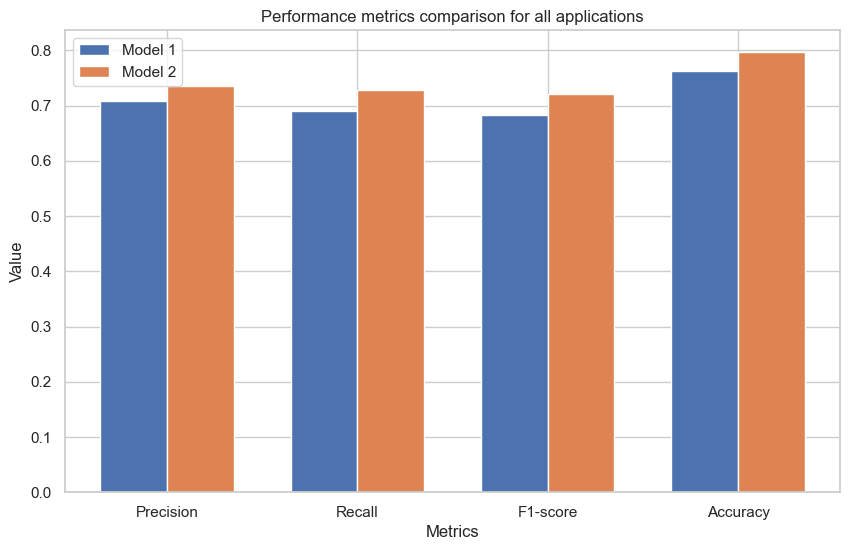

In [165]:
labels = ['Precision', 'Recall', 'F1-score', 'Accuracy']
values1 = average_metric_list_1
values2 = average_metric_list_2

plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(labels))

plt.bar(index, values1, bar_width, label='Model 1')
plt.bar(index + bar_width, values2, bar_width, label='Model 2')

plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Performance metrics comparison for all applications')
plt.xticks(index + bar_width / 2, labels)
plt.legend()
plt.show()


# Tables of metrics

In [166]:
# Calculate the average for each column
mean_columns_1 = np.mean(all_metric_list_1, axis=0)
mean_columns_1

array([0.70823078, 0.6901668 , 0.68337525, 0.76239374])

In [167]:
# Calculate the average for each column
mean_columns_2 = np.mean(all_metric_list_2, axis=0)
mean_columns_2

array([0.73533888, 0.72748482, 0.72019312, 0.79650127])

In [168]:
column_names = ["Precision", "Recall", "F1-score", "Accuracy"]
type_of_application = ['Wniosek ogólny', 'Podanie o rejestrację',
       'Wniosek o rozłożenie opłaty za studia na raty',
       'Wniosek o zmniejszenie opłaty za powtarzanie',
       'Wniosek o przedłużenie terminu złożenia pracy dyplomowej',
       'Wniosek o transfer przedmiotów']

df11 = pd.DataFrame(all_metric_list_1, columns=column_names)
df11.insert(0, "type_of_application", type_of_application)
df11.insert(1, "model", 1)

average_row = df11.drop("type_of_application", axis=1).mean()
average_row["type_of_application"] = "Average"
average_row["model"] = 1

df11 = df11.append(average_row, ignore_index=True)

df11

,type_of_application,model,Precision,Recall,F1-score,Accuracy
0,Wniosek ogólny,1,0.665858,0.599621,0.594198,0.685571
1,Podanie o rejestrację,1,0.647303,0.640155,0.642285,0.666667
2,Wniosek o rozłożenie opłaty za studia na raty,1,0.745238,0.740504,0.742615,0.760684
3,Wniosek o zmniejszenie opłaty za powtarzanie,1,0.698529,0.595238,0.619495,0.875000
4,Wniosek o przedłużenie terminu złożenia pracy ...,1,0.868455,0.920035,0.892049,0.962441
5,Wniosek o transfer przedmiotów,1,0.624000,0.645447,0.609609,0.624000
6,Average,1,0.708231,0.690167,0.683375,0.762394


In [169]:
df22 = pd.DataFrame(all_metric_list_2, columns=column_names)
df22.insert(0, "type_of_application", type_of_application)
df22.insert(1, "model", 2)

average_row = df22.drop("type_of_application", axis=1).mean()
average_row["type_of_application"] = "Average"
average_row["model"] = 2

df22 = df22.append(average_row, ignore_index=True)

df22

,type_of_application,model,Precision,Recall,F1-score,Accuracy
0,Wniosek ogólny,2,0.735412,0.752463,0.715078,0.717157
1,Podanie o rejestrację,2,0.774723,0.764573,0.768548,0.783217
2,Wniosek o rozłożenie opłaty za studia na raty,2,0.738295,0.747198,0.741249,0.752137
3,Wniosek o zmniejszenie opłaty za powtarzanie,2,0.670370,0.591270,0.611750,0.868056
4,Wniosek o przedłużenie terminu złożenia pracy ...,2,0.868455,0.920035,0.892049,0.962441
5,Wniosek o transfer przedmiotów,2,0.624777,0.589370,0.592485,0.696000
6,Average,2,0.735339,0.727485,0.720193,0.796501
